# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [3]:
import base64
with open("/content/filetoup.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQEASABIAAD/4gIcSUNDX1BST0ZJTEUAAQEAAAIMbGNtcwIQAABtbnRyUkdCIFhZWiAH3AABABkAAwApADlhY3NwQVBQTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWxjbXMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApkZXNjAAAA/AAAAF5jcHJ0AAABXAAAAAt3dHB0AAABaAAAABRia3B0AAABfAAAABRyWFlaAAABkAAAABRnWFlaAAABpAAAABRiWFlaAAABuAAAABRyVFJDAAABzAAAAEBnVFJDAAABzAAAAEBiVFJDAAABzAAAAEBkZXNjAAAAAAAAAANjMgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB0ZXh0AAAAAElYAABYWVogAAAAAAAA9tYAAQAAAADTLVhZWiAAAAAAAAADFgAAAzMAAAKkWFlaIAAAAAAAAG+iAAA49QAAA5BYWVogAAAAAAAAYpkAALeFAAAY2lhZWiAAAAAAAAAkoAAAD4QAALbPY3VydgAAAAAAAAAaAAAAywHJA2MFkghrC/YQPxVRGzQh8SmQMhg7kkYFUXdd7WtwegWJsZp8rGm/fdPD6TD////bAIQABQYGBwkHCgsLCg0ODQ4NExIQEBITHRUWFRYVHSsbIBsbIBsrJi4mIyYuJkQ2MDA2RE9CP0JPX1VVX3hyeJyc0gEFBgYHCQcKCwsKDQ4NDg0TEhAQEhMdFRYVFhUdKxsgGxsgGysmLiYjJi4mRDYwMDZET0I/Qk9fVVVfeHJ4nJzS/8IAEQgBGQH0AwEiAAIRAQMRAf/EADYAAAEFAQEBAQAAAAAAAAAAAAUCAwQGBwEACAkBAAEF

(np.float64(-0.5), np.float64(499.5), np.float64(280.5), np.float64(-0.5))

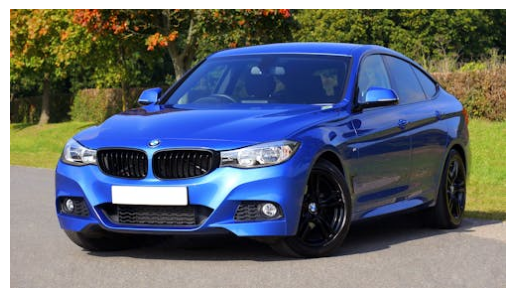

In [7]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np
import cv2

# PASTE BASE64 STRING HERE
base64_image = """/9j/4AAQSkZJRgABAQEASABIAAD/4gIcSUNDX1BST0ZJTEUAAQEAAAIMbGNtcwIQAABtbnRyUkdCIFhZWiAH3AABABkAAwApADlhY3NwQVBQTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWxjbXMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApkZXNjAAAA/AAAAF5jcHJ0AAABXAAAAAt3dHB0AAABaAAAABRia3B0AAABfAAAABRyWFlaAAABkAAAABRnWFlaAAABpAAAABRiWFlaAAABuAAAABRyVFJDAAABzAAAAEBnVFJDAAABzAAAAEBiVFJDAAABzAAAAEBkZXNjAAAAAAAAAANjMgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB0ZXh0AAAAAElYAABYWVogAAAAAAAA9tYAAQAAAADTLVhZWiAAAAAAAAADFgAAAzMAAAKkWFlaIAAAAAAAAG+iAAA49QAAA5BYWVogAAAAAAAAYpkAALeFAAAY2lhZWiAAAAAAAAAkoAAAD4QAALbPY3VydgAAAAAAAAAaAAAAywHJA2MFkghrC/YQPxVRGzQh8SmQMhg7kkYFUXdd7WtwegWJsZp8rGm/fdPD6TD////bAIQABQYGBwkHCgsLCg0ODQ4NExIQEBITHRUWFRYVHSsbIBsbIBsrJi4mIyYuJkQ2MDA2RE9CP0JPX1VVX3hyeJyc0gEFBgYHCQcKCwsKDQ4NDg0TEhAQEhMdFRYVFhUdKxsgGxsgGysmLiYjJi4mRDYwMDZET0I/Qk9fVVVfeHJ4nJzS/8IAEQgBGQH0AwEiAAIRAQMRAf/EADYAAAEFAQEBAQAAAAAAAAAAAAUCAwQGBwEACAkBAAEFAQEAAAAAAAAAAAAAAAEAAgMEBQYH/9oADAMBAAIQAxAAAACvwZYvzbfXfvSKdgAJmcnoQ5FftDonUwoEvcQqb2Rtc9TZZbt3NFTjNTlpIYbasws32gT5W3QAOLVZI2o5vaYmyDFQDVZLbTppOYxJg0k0+aqUG0NHh5maZLpYOnEnWb5c69OwM0hAhz4JCg2m2chpQRy5EFFWR/QA9/qY4qhe89JXDfBkUjlyiSAglZgNUOwPgkY8YhXMylCiN5oMddaHotsvgnkvocfHzLj9vewcWq17ui5I0Q0M0xcq/acu3BrI3lqhWSFroGreg6rlkKdtrrZwZPWGxZehyV80e+iKNR0KZW9ty6eKzmWqbJn8ruox4lSotmsthtbTeM/qyBIFgToCsSJsOaIefiWONPWiLOxpJ7roum6bVbLDkFJvzdUtRlay0NutuaKmtwv4uxSsmTPWb2i02oD7GRsNExrICDqmXHM3oz1SdIuUNohFeBnmfWVswO9DeH3JuZEBF2pZ7jQr3VBQLY3cqzRy4yJdq1l+tyN6svvIMyQiQRmIDdMei1regSsoQbBWcqDfzLVACG677RE7INWsmr6T6+llEzTB+myqTSbGjTjkh7d6KyyqbyVt/TQ1EXztF8Ve41T8kahRQ4fNTJnYdtvLNOewbdcEaAP5WyDNjhePdHwjCbcUQfoVUlfThlurWhDBI9JlsIFtEOCTIvHvWW/RIqkjOD0L41nBS3UbseXl9FuswapVqVg7XZ7GtVivpOAyK1cEVHh1qGXowL/mbzVMjlWW3ZIy2w2KZdwxS9VmWXg70bnvQyQ2UR2WGk+WxeA+fLUFN28SV2MWrThMTDSx8tMdyI9R1hjnrODLabL+fDkchq4k0U8MCDr9qKoWD1c5nSMKsr3CbcGZZRTJsNibTZHw4ea1GVRfQeW1F+ag+0LxfmlCjTVkxYZ0JZjLKq7Mkmh0ERIeCvbSHY08WDXnEmlprAerKgAlPQQQmJY+/EIOLkWDO0uow7cci5Ns9/geUqBC2ShlkPCL91srixSA9c0WRhfEhEhTHd5ziUkzWzdV7omw1+Izn/Qt2PZZwuRSqLiuO264iYILySyXY/Syo3x7MOX3NrAV8l571RuDLrkcs5ocWYwzAg8fIV9XfSQ4oEOw9rEDTV9eybCNV0PjkoJBN0jQIc3k75sLJjR3XMuuVA2YB6yAO3UsOq08/wCo8rXs/wBGymtZI6Axotmpn44vAsMiOzmmkhSyzrHgX3J1Z9aataHPqsmeJY5qM6lpa4vjSmU0/G4zW5z7XFqTfqBsxfQx6iWAZcoFDH6UaLJnWgYeqWfgyq7mwNhRchdkyZkUlbluiPKeufiTJORICsY2Ndtk/BPNkwU8GJ7XOyg1l9E9NN+kvmqcRrZWtAbFpvZ0XlJ1cQltnOx1h0P0DKzOp7g9sR5TaLcx0lCv0TaSOjVw63aZGlgo8yxx9CqESVYmYOjk2pEJbLyZACRbG4zUXjsckCKsoZzxiJXXSPXWhyM6Y1RbMzVkpdT1Yfh3ahZbySoPoxC9krMdRMnBlyFcwd63XNrp9bpT67zC5tZ+xUKtyuL3ZZJyBxegQaS9LPH9avNVBGbi5n5+MXTQeumA0jU/VWUI2e9ViSBKv9hRAjLdWPTcyezX2PRsKy8rXntuMWtwmk9CDN2kUYHNyme1EWS4tKwpU0K21tp9U2mq1Ray28mhrTrnx5XYkbifKojPmLyWLplz02ObmZFmkVi3DY5r1ZcoJRDQI1JHZsl2qAyYHFgpJNGZZ+jQ5G7U/kl93c/jQIvw25ujfeeUWocQ409sD0zzVIWFXC0pCYSWrdbiEkLDTbb3NagjdUA+xYucBbdkPRUramgphlv3KWUlYfKRdVfWrlA1jOacgzyWrckj0aQ16vE4k0cVB0rYq0xGn2inbwpH0m7l2vngntqaUmI0v6hwjntHOIRMT1tCVec6TTfpJfI5mWZaB1xrzV/rQKIlo4XrHHIMeRC9LJSZBKBk2btSamGyAaaOxWLBPoLCm3ZLa/MnrShYHPd8jH86nVtuo5yBOJWyDTNOw457dzs3T8KsNKxefhP6++WI3RhFjrVSeehiek39b/IesamdnQZqXl6KutrRaeWRCgPskXDW/pb5ButmL6Tt/wAn/T0TnHaRmbTe4dRa0auy/J71f6esJjTfbNWHRjULzXcDX2tJrPsSbkPtwhHiimiDMcVWerqXK7vOIdidxLrDEml2Cu2wi/Vo9nyfSkscR83DC18bIr3PETuKV6s7nfcS9VrTTZWU20Yya9h43XxUuaMsZRbDPU/yqP8ArOqcpt4oO1UfSu0vU07Ho5fxjL+qMjx9LMX9DnKTPGdr0B1b572beTzKSLKCuNWGq1DWKkZK7Ir9K6HOu1Ardb6mvGrywNnVfEKCcFt19yO3yWnYOCjb1d2mOxMfXMlkilG5TXgFFBUJXLiORveGOw5YgSIbUoRouSbpnv3N9a/OVBeeHGJfveJL9731KzzvOgeqNup9qPFUjmPT+dsP0J8q6rFUmUrbsq6LNI/Xfx/92cP0lTYufuS0aT67ecyjevPiKVItvmu+WRsWvel8kdLCb1byL9dwvz9wu/Lzc/O9Cyqmu9y3xZ5E1CtvdlVZtFYyuhiBbDRvN96LDmuZtiHba0cSMW2j3ljikelwNGK6hwEp8brJV5hfJ8gVJ5UTsesqLa6aTkbE3fEt5zZdQWh/z+4j0tKZzzfkpi0c9Mhe4ytJ2h3kDYZ8ifWXzoY0KtEPQH2n6Jw4jROtxvfTPxyU43a+xyHxBKqyfbk74nkA/bDnxA6F9wOfC6StLBVEbuUPoT6R/OvRL+R9A/NcgZ0RbBWGXyOzVbDOtGXYtmefS2c2IcgHJR1+f2uzRPF6tnp1xoEKbmwrfE9dgCWRygkYs7VrrnvD7sE2bSa89uvVvJ4tKWzv0uTj3JsyG/Xc39J/N2x58m+O5NL5O5pPsyeiGjeonkdHX5ffVW+SGwm+L4V87itWzb0nEgJMVvWolns1m83oEbDE5WfT3LeuhILcItBzDr62CK5KUnRapfGS05XYh3os2D4hftrNymN9Gwc8YFN1qvW3VVicDfajhSI3Hu18TMb4rUjsyhsRL3ih3iQFK4FAMfZooP00cllPYXe4taMf0roURyR5JwnClNNiJs3EoA5sFuhf87S/pwvXk+fffQnqc1a63zShkea6EryuJN4bucFL5UqutZFLHHhIYcxT0XhBRQjiJl0EtwNKDOuRZwP1IsoI2UcbDJQKsQPNO0W35q9o5+9CsakXGaOPqC4bJ6OMi05mUSGqcjLjk14mTosWN8OJPkFotw5NKrj1pJOFOma7bGOwQl9KGY3/AD7Zdi6x+eW0k8xwwn6Q0zSFeSx1qcqjgNo8B80jVtuWIuIdQE7xK0mm5CmkfjG4xgfi8d9ph5ofj/n17wr5E79chEvmPn0YPcMDRvLCGF82xkrFU7GhDH+a7xLJO6s6lkftecRx3mujXDMpOiyEs89pjoOQL2iQlicreTrT8zS/qSwpfJti+qXUfm+y7alrsytFnbY6Oie2wsrV4pC3PJc71JC/e4knvkEKZkJRZ8/4ta4lwO6tSQudc8glrikUPcUC2lzySe9WE1yQgJLcppFl1SkONTGUmluKSjceUizyS2kz6T1KLyWlKP19SDHHFlMrVwHvUOJcR5RTau8QUlvxTjalJNe91JCuvoQn2niucUtJpx5CTXVKIZbXHRc8vxEN5LIMh+I8gvykA9Q6lJaXfAp61JQR1CEXW/OhKZeYSd51pJXuPJceRwh1hxoLiXPI+cgyUVNPtIeUzJS6hKUusu8RcYdaIdQptJS4ryTnOOI+4rqCGJCCEKdaScjSoaTikOpKaRwiVxDgMdxLBT3kejP/xAAzEAACAgIBAwMDAwQCAgIDAAABAgADBBESBRMhIjFBEBQyBhVRFiAjQgdSJDMwQzRhcf/aAAgBAQABCAE4y7Zns+5tbQrTJr9Nila5k5ulKKKsi562ey21FaMHWo1v2k8ymqng5XHxqKwROo47UsRMdd2ry5iseVzSWJjhTUrlrUGod2WcR4Xe8S6rtpxXtVZBcW5NjWEsDfUBrpl/PiDl5A7nnDtLEB85n74tIVrbSi475lBsWtb/APK3cTNre7m12TirUQn7t2Ur7d/UFNa8sXMN+9nFa1nC4+HYqgFq/QpNbIWVnryPuGcznWFAjXqU5C3gdCKLyLFmTQeTBWQswWJ0/wAabLbVIRbNc+JqSoVlYidtHZ7szlrhmXi3wMbCsrRWKu7IFD4NyWsDUcdscS28qvMU5dbn1ZAQg9v8OQKuA4M7n8Bj4dx1Eit1RaGCISeIpbuZCUg1sy9QvUqinqoFoZlzMZ93rc3K0MSpqWuyxrWssDzOD7DSil6+LHqAZ2MxOk9xXeIEO1ZuyfE+3sEI9Mx/ySW5Ngu5Q5FArQDFXv31q2K+TzZZlO3prsx72Us0OWBXqV5PdPI4zvz4Ln1VcVAREZhybmVnn3it3rgbHPBisw8nsWh1x84WV8mYhmdWUCwae1DVjp2aAblaCusoO9dlIHFa1ZNh9bW5rJbta8yyz3yMpQuo1OG6APl4vZYax8ex1Kw445ajVDt8C12NzqEy+9XcAO9fxMxrVKFnOQfAP3VIUbe3/KeIvZfa5FsLOfQG8635gBpSyu37VKUZpgv/AOLxTMsF9gprvsajGOqbU7v+XIwFezkiYlWNjcSWsrxgXdjfS7lLGRo9pGiwvIJZhmVigPY/UKjzRsYKjcnOUFt9FmWzOSFZn5SoAe2PTlsxaq0Wd1w/RMU9y2yZRahOJdOWJ3VFZ2Zlhm7crrJXjKsEsgZrKb6UZjaKg7Rk86BTR4weAdFTqJUr1cpiY9hG2NCcQZh19qt+9lWJYa4lYSk1yyvNFQacb3sAmRmEOqS5waltXCt5ZBdjlegmPdSahvt0lucyOnbd2pppzAfGRc9jhRVjiqhrGqyGF3llxrE8dixqjq5Sp4wZf+HiL8mjtjh3WB2bHLHc4+jc8fGVnc0tDJfZy89PyKqUCvbmg2u6tmXWhdrh7UGdMbH7Dmx81eZK5ucbRoYYWtgLGrqv7lr3e/pGmJBLN7EWY5TlZblPYBxLKfy6f0VbBux8KtKu0mT0ytCXmTbRRheFKs3jDRqcK4xKmd7CErrShBBi09vmSaQqstgqBqBS/H7HKc+64WZFFYtOr6lTjNVixeWxzMZVK7nT7VQsDTu08mqQLyn3D2txa6k8+bWLV8/duqTvqoZp33NT2qbzY0xbArETb8SDTaDwRnasKFjOXb03UOXQIlXFWY3I1n/twcWgFxOzjzJNfMPLhz5NK6d1lyGHGDHJ2T9vWByZuPgroTMsRrjwqRu725kZhVeDcALm3XgXdlnFOMz461jHw+3UzQ1ub+QOGK7ktLIv3L2NdlMMraXZJFq7a7SlYoq7LE/l7MJuYWU9+KxXN6uXyV4v1SpqbELCVMPGrM5u2EOI7JZqFn4agrTwJfWzksFsqs2LbQ5VEqxenZgsDxuhWOxJq6CqoQ46Bh/7Do3Sh714HS6/YY/TAYn2KfiThGBsLYMLYROz/wCBLKOm2DTN0vpDAifsvTAPSekY6+Fp6EnLa/tOWugF6ZfXknuHEprUcrWCWcaxvY7bMLq3RmoNXmJko5RbHubsoFyMe2zi0RNjUZeJ4waE8uABq7QQvVYh3ARMjHpUcUwkSotcb7DbcxNvNSIcy80gijqNAfxdTpKpbR6155Nr12osOctYcniXckkbTcrRfVEAJYRAQziUY3P3yaCj6guvChQxJ9y3HUK8huVVHkSX8tMWtmU6eg2VeMfEvbQFfT8ZfyDY6fi2bDmLDl1Q5dE+7x595jT7zFn3mJPusOfcYU72FBbhz/B8AKfY1XeNNa29Sn4JN1n+rZWUg3E6u6j1jI6dktsXYTqdhaqu53GuZ/RZMnI0bqW6bYRUAb8dn56x+ljgvLNxjTviroCRLE4n0pUy+sYV9bntzq+Nc1yhTg5DeRwqYenIouALLXiNTa7wrSzsjtZi96wJhgvkKRkdSCAUnqZvrbmXIJ05BXkSSw1rtkyrHqFDOU5cmcKvddmhCKAQbnNvr8EbicA8yOJf09OO1ZTkcuB1RWfaLh/b0uz4/O5laM7RiISsLLOSzYjsupuCFlnOcxOQnITazYnicPIBXyQJjANtoWn5AiVt4l+Lj2/mMfKp80G6m5wtopWpgJlUVNkbU49aemvFwVV+UvxVLamRiM1yov7VkODxu6JkIyE09LK6VcfCStzM2pzzIxa76KVSNlNTkI0zMw3APP3bL5bmR1Bwmgr698GnuWgTKoY5Ieb5WHkiU8rJXkVa01HCzI1Y1HkzFrS9CG7Q2WXJr1p5yeyvjMlLF4qyWeCCSQYW2ZgWEX6GWnIbFBFSrY2PjNkEWXPZ4mmJnDfgN6j4YwGdOxqrlZrOpYQqbkg95jY1LKeWZjpXor9QCYEJnCGV+Ss5a2ZijjSghEXxLfTYZygMyMeq1fWe/hfkDjZPYesis2NqoTLchpT01nyAzIFrTimKoB8hz+EVWrsUm9vJE5qdw/ZV8jFxu6/JXxjWRGr8elbAMYpMNjXZyFvVOSequ13tYpezaEQ8EDDEXFX8+ZUKJYldWPuWHG7RJvPIeKneszl3H9bIVUkfExERn9VVAGTTw6oaMf0zFxmubu2u8YEe4u0fNlvo8FeFJnuYYmRan4vl3svFuUW2wL4e129/qLCJxLIGHZPubBpzKYx9YE14EHtFl/4gxTBBKz/qb8W7Ec342F1YXqpWrKbusssyy7mKzh9FrrLA8D/+Rpa7WNgELgHavbvfPevxC2uCDh2cW4M+UQ/qpNdtpjKAx0/Mbg0PfCZhcIVo7Y5lqeOhTkL3K1TqWRkIyifdJWgVbbMmujgL39td8eAuRtmEYO3uMazyZUzVk6NyVjuTGoa9+7azxVJlwM16tisc7NzLs/1iEDzHPj6mY43uXKB5H9lBJQicuI2bHDvuUj0wuPuK5udxV8QOCY67VhKzB9CdENAZnYq4+QtyfcLsdxaim9W1oQSVrZOWuC8g9uK6lnVHcCziWNezrtGwkm4GpVjWP5aNax8SiwpvQ3x2TrUKTGsatjMHHBDMyV1IvBawm5b5tLy9SE2LGdWYHKCkbg4iomYGObmYtVjLr09Z549StFUJ/ksx6WybC7/wBaprIncaFzArlfFNFgTxcloc8tDxCPGpo/TRPsr8V0CxP9tTaYS0rwIggGllnmwCUpulDP2+lfd8WmW1lR6abS21KmDzO3sRNgaOaBbxri0VPSqM3eQFp3EAbXfBXkXsrICueKcyhxeGRzm+BJPfr/3tap3hQanj43HHojDxCfiVDyZSoSpAXsBQQcB5j7KzLs4njLd1kqbTzrRh6STMfP6dRWlbL1jB5AJ1fMw7O2rKHyLfI4ooVcbFSuhXOb5t8LWPn0wuIw/gX2a4mxR8LjKygz7RJ9jXLscVkaKGaM0Zr6BWMFNphosHvRS7NuZBQJ4qI+6XliZWPVarNd+pMEMRP6j6f55WfqHp59q+oo96Mib1A6id3+AHLbi4535FZgUyzGVSXjFT6AKyldYHg7ljunHjXYHLMzVqYI2tKJjVpZa8sUByJfSy1ib8T5nTFrN2n4tpNOu9NG9iAx4LMiyzvebbN+C6p9rVGo35akVKNNSlYG0yK6ft7BGpZgJjJdWxIX7houNkGfY3z7G6fY3Q4N0OBdP2+2ft9sGA3y2A3x9jZBgtHxde5CCclnP+FycpfbH6xiV0jvdQ64l9YRDkWaOj3Pd7H20x8Rr9mL0dflek0CJ0ygSrCrU7ApX5AUQagdRDkVqPPencj5NKD1U9l9S6vJNzFFtr4NCm0CBCiDgCzeIqjQmODZaolJ413zGxjZkIh6tiV/b7E4kzpl1wcVRE8HdvBvE0ysFF7r2zvGwL8h+UHRsP5PRcffj9oo1G6QhHpXo1Y916bhLBXir7fca9jlGHKMOSYckw5BhyDPuDO80XvNOzb89uyGrJn2tp/J8Skfky449tj49UFB3udgfPZAnOhCdv/m8BcPEU+qqlUHoFRi0iKqiHU3UZyQQ2qI2bUJl9Q2kXNuIAUUZ1vvd096qi5wAW8SrFya0cpb0+5gnIWdrfJbKz6pWlliBhf03FQnddNVRDJV0+9uWundIND9xs7CORVwn9MVfNXQMOuV4GIjeC1XE7LY2/S6XuPSuFxX/JzndndndgsjXRrobYbZ3JznOcoAxgq/kLWILVHt9zDkGNlRstvhrrGnAmCqcEENqKIc5N6Aaww4gb8u2E/DKOSE82D2adO9OMm+6IbDDaZZlKAYuSS3h8h/JPf5H0pi5L+9XT6V8sND2UzqluqlSdHr5XqIfYRUWWYtLDycOjxta1XfFsZWMTFqU8p4hbU5MRADrbEEwCdtP9uevbmxl2RpiAbTO5Oc7kNx1C8LTlNzf01NgTuTuTnOc5wk/TU8TnGvhudj6RUD5esKPbHYkTKz+FpA5oycxZn1lSItoapgqPlNFcL+RyX+Ht/wC3d2fSmJeW5Hs4lZ9bdQVfFb51pn3TyrqVi++PeHUGdScveonTH45Net6BizW/cp5ELrNamlnETY+eSwgGBdSrHDJs5bnFcBzmx8uxoSZubm5ucpiY9mRcK0zOlLj1Kz7m5sTazaz0T/HNJOKziJwnaM7bb1FwshovSsgy3pThfNmBfynrB1NwXOJgZgO1NvTxbkczaoVfLnF34W7/AK/5TO1kmFP++6h7fc2a0pZzPVqaMAM1/EoLhzxPqbZ6f/71E3/Kn3n8mDlOP8ciZ3DDYZ7mFIx8xrvxWZAyPt6zWgHDV+Z+n6auPZv6bkV7Mt6pSp1D1hJ+8JF6xT8p1XEPvj34Np1MfpBV1sXqFFYbdjXdOUxs/pgn7l0ufuXS4M7phM7/AEkid3DDhWU4J/GvF7n4V9D6lYPSn6Tt/wDu/YMGobIqqVTxWystMumr/RMfHAXv9SwUqyiay40x+hh5a3KbrUPKt77LvLLaFafcVihHj9Qc+z3WN77nmbaCu0wY7keVw4KFE7Yhx195fyVO2gayt9zpjoyBwvlRAJ5XwxPjUVdjzqAQf/sb34PmATJuU5iAdUw7mwVNeHn51Xpe7Azsi42Dq+Ll4uNo11bLLLa1rv4k8e0IRX3LYa04pOCh7COidYJ6UbHyMq7KtdreA7W4a051rFFfOwzinZj1p6ApSnumJzFOj+k86vHvyS9PUqrVYjC6njvlBB32byHB4nllLwo8X5dC+QuTXaVoS+6lEDN1PKGRkOUYzULIicjdY7nZBIOxjOLVjg/ArbYgoM+3EFKQIvxubm/abP13/KlrCWl9II8dBf8AxMJS2q1ituN4hPpEDTiYUaAWTiZx+JawrRmliP3Oa053VaR6Gucn109TzlrCJf1Tqz1slmUjV5DTqDBr0cN7QAnlGGmWa9JnTif2rMEHuZYp8RfynD0CFPIEoxrrBYyeO1Lj6UE6KtoS6xGTK/J+ntQmVVZKurVFhx61np2XFfSus34tTV2t1Esxi9QzUH+PIW+xuV1g8ThDUAJknk2oqiGjcxnNd42da+uvrqa+mpoRplNqhoTxrAGTpSs6IurbVlf/AKhE9458+PVAT8gfXkZszqj6xTK7Ub2pMC7jroxDyGp1bpBuXkltFy+luI9W0HN+KgAKhiY7ubEHSq94Tg2VsjkFtaWKPUZ/9SmaAuErA5OJVS19C1t0v9Hu7C3Lowq6xO34lvT8ez826F03cTpeCvsaUX8blEyJkt6o8e0CPaQhY7G5yiWnjo2JzErblSDCfj6efpozRmzANzgYQvwx8zNb8BERfzmTby7U6R/7C0VTx8hvM1t9zzO7/d1j/wDEP0ozba5g5CZH45FfmWWcDK86sjzbXXZLem0mWdIpn7Okx+i0c9vRR05VAmd03pNoJD9ETfgdGWL0WrUr6NQdbxuir4mJiY+MsOdV/rXbyMrXxLNCZGTRV/7LuvYS/jd+oWP4WdUynll1re9kcmama2lVYPy+iP5+lB3SRKh6NxZ2zFpnFZ3UX2J37q05NDGmWf8AKY45OdeXedArOm3ZYB7r4A3yBMYEnQCaA3/b1cf+I0143OMotsptV17iZFK2Lm16aHe50pEtzqK3/YOnT9hwIegYMP6fwp/T+JP6fxZ/T2LP2DGg6JQJm5V1PUcigPm3N7hzKtkzBQ8Ruy9KqyzdQ/UV95K0cWJ2e2Z2TOzHrlwj/TqIA7UQeT9NEzHBapkOG/8Al4zHT0EQaUQ3KI2TqNliHKPwLLmPisaXyEZodQj+XfbgzDpTlkB0WwuZ+mqv8dwLqqiHfDc4+IqKItzKND+3rGhg2E/vSD0q/Uv5/cq50HqCljXMujkstp1Olnj1DG/+L9QHj1/IEVpWsw8fk0rAQTq/UXzbe1WlCqIKxFxjBiD5OMgEvqTUyPeNFXzLrTYdsPeW9vxxUa98Fh9zWSy9q8iO3bB0+STDY5nBjFx2M+2VF5MtibAC21INmzP+IjhvbIbSNH/1i2Mr2iYlQLOW/S6f+PaRYh9yAIRv2KTs79/7Nz9QDfTLtUY/L1CvCoyel1U1FKzqVHtsOJ6xjLhrbbmfqHkx7VPW8lL0slf/ACYf9l/5Lxv9h/yTgfI/5H6bF/5E6SYP+QujQf8AIHRYP190Sf190Sde69j5XVmyKU65UD5w+tYDkA4gTtgr+ouscAcet2gRmOgVt2dMjrveNhZFvb0P01kp4OTkdSw7u1e9nLzDLXApeYOF9xeFnVuljDakhmPGePlLWAKrk2Gxg5b1ARcYQUgQCuBbPhsYPrmmPUnsWqrGzf1bGAIAuZm0Mh6RUESz2l2uO5Vy0dfpkMuG5hBPuVbYjIfeeOMDP9PP9nUK+5h3JKONI0x6hYKTWr+FEZviYLJarY9j4wS16rbaGRyspQhG2alHuuM0XFeHFefbPPtLdQYlpn2tphxbB4ltJDahTxOi2ZOIrXCxyxJJin3UK3nUd9PMTqDY99Dy/LpvZbK/1W2KwoqrX2hmUf8AGBMS1qnLTqmcMtQwMQbdYlSfcOJkJxTHg2AsNx3oJjufL86qxH6jjrH6x/1s6lkNDbswsfosPtG22ONVKeE6f1Kyihax+/W6n72eIBbrALeB1hvlOsV69W/7Pb6ZNPbsZZ20MOJWZ9k3wMWZ6HJr7kqYHQbJYfb+G9JMXgCTECa3FWuz2CISdFKw3GMiqBtqxoxKtiW7W8CJh0innfY5douHkNDiKPy/xK5169wreTsdi5pXRcnmbdG5K6kh2aZrHaAKHPgLoHUbydTDTneuyanqybK+uKi5/bV8xYMxl/F8u5vcvN/3iYutkEoAIAmp2d+3baLS0FFjfjV0TLKgzU1B9NfTqmGzE2ALozY1uXZRPtZe+5jdQ7bDfcxLfMFVQ9u2k7P8dlocQtBgPP266ft2TD03KI0V6dkKNQU41LAvfncyJV15610v9QMW9eF1LDyPCtWwj8hG3LJZHMJ8H6ZTf5WmNaaWDTLv7tmx8biWHTawrFrsRzbc7myxt/2ampoziZ22nZadl4uPf8Lh5O5Ti3n86cINMbo+MwEr6JiL7pgYy+wUAaGvE3PM39TCNjRz8ZqLJlqdAg2nXk2CMR9BdYPb7u6fe3z726fe2T7xp94YMkmd+d+fcz7ifcNPuGhtadN/VF1I4X2fqzEaN+oKj7P1pTG6kDGzYc1fM+71Dtm2WOzNQDRlOOj8FS9k/BLf4mpqcYEgrgqgoi40rxGb2q6NlNE/T7/7VdFx1968LHE7FOxFWsRLFAgsTxOSTx9Pj67+hnxLqa7a+L9R6dfj7McAxl1/8HGa+m//AIhY0WyHzOGx9NTU1KkHvOQA0pMCQVQUwY8FErxuTaFfQ7z71dDpH5Jg4yfjoD2hnjxNfx4nmDR+nmc2E7xg9pqeYJ5m/qTOo9HVi1hfEYE6OK8+2efbNPt52J2p25wnCcJwnbnbnbnbnCcJwnCcZxnGBoGjLvyD4m56Ztfj3irEqJ9q+n5De1fSMsyvoN5/JOh1A+qrAxq/x19dTU+Jx8RYBNzU9voZr6Ge08/TW5qfE4xk+Y+NW/5HpWG0PR8IT9ow43RcTUfoGKfY/pyqN+m5/TTw/pu3cP6cyJ/TmVP6ezJ/T2ZP2DMn7DmT9hzZ/T+bP6ezJ/TuZG/T+YBP2bME/ZsyDoOYYP05lmD9M5UH6WyD7j9In5T9I4/yn6X6f819A6csTpuGg8CpB7amvEOvjQ95qcRNTxNmbm5v6e0+ZqEzx8zX9moB9NxzAfEGj9PjU4+JqfH00dQgwfECCFBNQiaWcZwE7YnCcZwnFZxnETjOInEbh+mp41NTU9oD4mxCR7zxN/TjNTX0I+Z8TU0T9dfyZvzCD9B9NwQ/EIO4wmvMHt9CPrr6fE+YBNT5nKAfXf11NTUEE15nzH95/wD2A6mh7Tf1/iagH01CDAfE8wwwa15i+TGGj9NzzGEUQkj6eYYJ8/Qn6efoRPmbgMY7M8xdwweBDBDNbhhMYzc8TkNwe4nz494NTl9Drf0+foIIZuE/2+PrucdwjU3N+IHETRP034gg+iwe8b4nwZX7xveN7wQ/RfefE/iL7Q/j9D9P9Z/EH4wwfMM+I3tB+Bh9p/P0HuYJ8T5jQfP1/wCs/mfxD9PgT5hjfks/2j+y/Qf7T4gh/Kf9YfafxEnzB+Q+g+n/xABBEAABAwEFBAgEBAQFBAMAAAABAAIRIQMSMUFREGFxkQQgIjKBobHRMFLB4UJigpITQKLwIzNQcoNzk7LSFENT/9oACAEBAAk/AR3ZIM1VnknuuuoGjNNulowQvPxvccgrIwR3sKIC+SIaBlgqOODRkjlNfdEkExA3JwDnOFMTBKeMcBWiw4Sm1ykYoBp1QEHNDAJwjedk3hEjVD+Ja1gabyj2oyy3IkXqJl4sbE6JjtxTxLe4RE61TgWh3DxCmrqJuBq2Jko3XRAJ3oQCINckXbhFN6N4nvDcmAP/AIhLhGWSo096vkngkYalQaSshgmEdmkpmDu8r3ZcqSa5INic6oQHAxnwhNHZAmETJ5oOCdW9qrQxmZlW2VFbEhuAzTOzeBO+Ex3GIg6LvEckJAmqHdrqmyT+HehdM4LMCAgamqJGwt8QnEMxJyRFTQ7kQ54zClxRJMZ5INeBStOaYJ3KjgbpBXZGMHMbkOzeLmtFIBR7V8zXGU2659BGcIOLXCezjAxQa0NwpBXdbSYzKeezMeClCkwdmqMRhAVi29EzkjOvgoIALdJVpRhJIbkU7smh1U0PZBRaK1IorS7XFG8+aqBWMVN3TYZJjdKmlCjUJ3aTsk6jcIOIQ7P96oGRjWF2i1sgJuGEJvaaaDC8rOHmhkJrRddir07/AKIxvmEZa7unVAycK4J048IRPYbJ+ynJQZblQJze5NNyJl340Q26cQm34pKIgmQhM4hG7TA4ysNjpa/LRWZIfQHRM7N7HNG8ZlzskJv5nGiEtrMUTmthgoMymkvjSapre0PxJ5uhoxzOgUTEc1DyG8liMBKsqOwB9U2GkCk0B1QD7PAkVRP8MGgQAEygIUqZ/vVd+azuUGLMhoT24TdaMFN51pDkME1o7INN+qEo5ZViEWkPdiETEeaOKIlY6rVGIxTg1poEwl8xGqYAQ6E7S7uTqureCYMaawgZc7+5TA4Cu5E9jFrq1TL16SRomAHMqxBb829WTqDPAcFbwdMliDjKY2dyNZonXhqaprnOG9GLPIHVGYwUCN1furIEltTodhWGxrb0QnkjQouw8CuDRhCrdEBO7eLh8q7raCcSr12Jp6JsfKDUp3ZFbu9EMut7uqyERqgK0qi4xghJGAHZVm1gFOzRS53BNHBMaGXhQ5jNPhpOQVCRSHJsycCjD3Oi6nSW64lMJLnV4J8AmN9NFEk93cos5GGfigCCIICho3VCtG0x4ogyMEFWuKx0QkEUG9QG5NGJKoQYrVOZTwvJ0gUEJ1coPqqlEXjM61T2gNoNZTAG6ZJtDnogYcpLJkgIkCJIxURuV0uIqZorGCKAuyVqDA7oThP0TLtaqSA+IwapN0YhYDZNQnZHyRaZE7OyIuukK7Dvxbk2bpgeCk8N6EQcSix84uzJ8U5pZNGfmUObkTgE6jocKJ36kM6A6LTyTazKmdh2MuBsBpnFdkNF0zmmd9vZOmzxUQE0VqXbgqAZjBNhwiuqNMh7KsYU1Vm8tJkgKw8DRBjN15WrDvjBW7zwEL+If1KyP7irBqsGBWFnyVgyRhRWLFYtVlnPeKY4fqT7QciukE8Qukf0/dWjHDkYVg9oy05onvTGafBcY5qW/hIdoqDuhya1zYHHirOsk3gNU0Eh90ux3o9mKV2OmvhsklNJTYQVXCb1FdcRgDqsSVRNEd11cU2/aPA3AHQKt3PCpTv8xsXWUAG9ON0ODpz4IBxdQnDZ4yhljtdnseboy4rHZgQhQI5L92itCA3zlOF35irzzyVnZjkrRvNWo81a/wBJVo79qe/9v3TrT9o90bXkPdG15D3T7X9o91bWn7Puuku/7R910vnZuXS7LxvD6LpPRz/ye6uun5XArJeATHO4U9VYO/cFZWzR/tvDyTgHxFPZQ4fNonE7zhVVg4BWYJazHNWddZRBa6zOFKp0ElOEE46bKgp2aFZH3TTcqSrOiFSJkURYQIw0TIBo2US1rp7UTiu43uk5wrlZrgYam/418Y4AFWkAiGhp11VpeMz5bDign1EQNZQwOCfdLxe8VT7LPZgsEAYrO7ZmrTE03cU27Zt7ozd9k5FSggmodQBAIBBDaMVqsMuAw6lmDvzVrI+R9fNA2FpOB7rka5DVGtqxpKElpzUkzgcO0vsIX+W3mdSrKZJqEBNBGNNUOzMycjoow8VOiJGNI1KDXuCcWuzGSfWgk5BWpeMzEYpuKkDGdIQe8kAmczkUa5lGTkdVZlzlRu5O4JwF3AIDhKPemmEJtb1EyKIU3bfxAhUp5rLLVdz8LNoWAG3AGAFNw+R24dY7MgVkFptzrtaCM/dTbWAP6mIzGe5M7xE0WUJpr9UezWg3pkCKD6pzS6I3qBBhHE04IQAQUPKU7Ds44oC7gUDVY6KL9Uew0doHNamC3KMkJk5oRVOHaoUS7IwrI9l2Ls9E1p1Gibi2BFIXdBU09U9d3ZllqpxEqpjDesPwjqZrE7XEJ5I02FH4OZHr1Mj1Ml3cX2f1CfQurqCjhJ4px4ZK8IxVABjGqpTFSDMYVoowwxQkmpWCwLpmK0URNdU2QmYnlsMbBOoQppggbgKAqi2SReaBRTetHdrRF1DK0TDxTIjRSmGBuQaQcQmgE90KrfX7dTBYDr4dbXqYXq+GwohadTx2OLGum8BriuyY5ppOeE1U76q8KE1xVOOiBNw8lUxgDUAYkqzJwjNBw8U/ESIVJRWezXZUFQaUBVm2BGIUUFEAPqmgCEZqhiFiibjfM6IBvBEm8YVT+FupXdz37kOAWKO1s8E0g7Rs0nYesduaxL7o8ELx1KYFI4Lvt8x1MqLGZO4IUHdOi7UaYK8TOCaZiGjim3p3J12KcN5QJJaaj0KAZBHGtE0TxhCgaAENum3SiGA8ViSgjhmsbojitZTcG18FQYoWsxJIiCTxTnniK+SvG4HOjecJWGe4LAKrneQ2tCaNnaGh2WzRuVu1WzU8OnTYOoCrN/7SrN4/SUDCBB0xRgSFaNgOmiD+Ss7bwu+66PbHi4Lo0Q6pL5psKBQ6kx8v1T4pJrgntMNNTvWGEoE6bt6kNcIn6p079gyWELIoYjayQso2GuqqiiZR7V0zzTiN0FBzgmgA6BXQ4inFG7wQDuasHqxf5JvoggOaA5qOajmo2eqjmvVFo8U7YE9w8YVpbPtNA4x6qwc2vevklD6qZRhODQNVaOPBseqvHifZNTdp2UUbHgKjWEkAUlGgd3ZqdUQHOIw35BPk5+AwVYpXJNG01QjtCUQ0tG26BvQzQiqE8ViF2WfMforxOsq0erV6tSrV3hRAnxVk3aeuDsHMpzArVWgCLj5JuwKEE8JlPmKdXSYTYnaNh6gKdwgIu8TCeKLM+iN101MVMIiWZZIFroEoCHVqmuronuk1oE1x4qzo7MqCYpCdAKtHIuKYhAVmXqwA4lcbvxzsG07D1OZUlB48IV8qwPEogA6LBwn36hTgoilMU6EC4qGhdoqNmZ9FlJ6gwwVKoBCvwB/Nc1zKMlDY0QMUaRKZKYGlpBb9VaQE9zkE5NJV1nqjeO9MAT+VEXc1XjswDQszGw7Y6xWCpIQJacH5cCmqnXFSrRsuddiazwQCATU3zTfNNPNB3NXkTyRRCIVeFUwqAnieCLXHaVQo9jTeoDVC8grNxTQOJVt4BNJ4qnCmzXqujVGSsjKEdWViqI7czCF8k4aBM7JFRirW6X1Fm/LxyTLwAqWuafqiPMr0Q/p+6A5FRzPsnx5jyTqioIcRjvCe1p8XOhWw5j3VoOZ+gTv/AC9k7/y9k9vN3srWu57frCe6znAvFOYlW4f/ALAXeisekO/4nD1hdGDP+q8N9JXS2t/LZt+plAv/ANxLkygGTfugY3Y+itTJIuqyBMNmsiTRWhFnJmD3Tm1DGjdw2mArSfGUU0HinNvO/AMQEAET1AVqp2QgEa4krFYladQHr4Mx8VZufdMiM1YPDaUM04K2a0UgVRFoXtdJDYiixoPNDBkHjGKxvGVhBuo1MzuTwLs3TrGiImzveStNTH95oib0R9U6kC8dJ9kaAG7THRTfLvII/hF47yr38OTxhYGoCkTZt7onPcjbU+Zhb6p7S4SYzorNxPJAiUZLqxGiY+YzzVi4OJkSiA0QhFneJ4nrd4Y70ENoTfgZlYrIrRRtlRsCnZkE6HZ71h+V30KHS2n8rnD0MJjyBgbR0eia0tcIN0+6pNR/fFYOYDs0WYWq/N/49TOFWibeDO9qBw2aJ10yGg8Kq26TGoa+F0gSx0xruTmxlKNnfcam8ArWxthILQXElqsnO4Md6ldFawxEvOXmrUvOmA24rAbKFcD8XOiMEn7LPYfhat9Ua6dWpCBoioaHigxWRg7kCXRICEXyfSENuRCzaj2ppC6P/iCA0sHaI3j6rwsx9UNlkx3ELo1nyXR7MfpTQOA+AdmI81p8Tiv/AK4kL5Z5lZtC8PhfMNlRvWIxG2hQa5MKCKtHeCc4AJz728URMcUTzXqUAfCfWUx3p6K4zyRnqWjW8SrzuA91ZAcSiBwCcdh2ZnqeB2Dadg62VFwd4IV0WR2RVFFT1tQhsxCwI291zwCrP+oprv3FB3NXkT5InkPZE8h7InkPZE8gn9ll27wIVo7n1CAAKlSxnzfiPssfgYwVptH52eGIX4l8x6hlDYaobcygQbpIKMKtQsepEdbAR6qypxViRVMcu67uzrt//Vvr8LOysz69U/4TTU/MdsIodXHLh1AYD67povwuRx2FDZhvXsqnRAgbNNhosqrGRsk7Cih1fy+qxFIQkDowdBMdo58ZWcGIqqf3RGMiAJqrKB+b7INN1wdEaLoPK0+y6HaeDgui2/8AT7ro3SP6fdWVuPAe6bbftX8b9iNt+xG2/wC2U15s/wCE1lRGCs3p9z/dREEahOqe+dN2w+aeTwMq0w/MrR/bMCCV097bSJu4gLtaHUajack6ABLjjRPvXhKuj1RRIBqfBYuAK0Q2V802OKNBkE1XWpt/0RDAnXjNTs0vfTYMbT06hR62bCgbxPKMFETIyhF3gjE5Zow20wPyvyd7pt0gwdx2G6KVIVpZjhVFg33plEcZoq8FXhXYOdPVN+n0TUNlo5rSCGMmjjrG5GSdlySK3vlVpNMLMJ7R4VTZFmZQe+zIq5hkzpCMvF4uPkBtzcprT6prGRDQ1plaLVCgs1nZgoZKp0CPgEQESeCZzT44KvVyMHYG0KY1WalBTO6OvgCmokJ6Iniv82zbFp+Zowd4ZrEYHVSDIylOs21xDZKNjiKz9ELLjKaw8D9k1v6SFZidJEqz5ke6s3+J+6Za+Bp6rdTFYafRDcAMhoEwjjRWjQrUd0CI8079jYQf+yqZaeKkHiJV29q43k+847OKklSNVisM1M2tsGWY/KsLJjGchsonn4WaaBG0oqpUCeHXwgTsKoEYRIIwcELp/JhyK6Q4foPuulDxY5dJsfGfZW3ROf2T+hn9QX/xv3hWdj+9vurCzP8AyN910Zh/5G/+y6MwD/qD/wBk+xEfhs+272CHZGDV0eyHgujWR/veEGtd8pACCnq6bMhC/sIbMSqssO1xej2nGfE/DCYUwp31TmjiYXSATo1AniVZM5IR8AUXdOBR2RtcU8p3ko5IN5JoTWprU1qa1AIDqA2rRgfxBWD1ZO5qyPNM801BN6ru241mjWhTcGfzHX4TSeCs44p48Kpzj5Kzb4qzbyVm3kmxw2H4QoUC+z1GXH+dMJyKoPPrhQ1EnyVi3lKH8q+ODPZOnYUf50KycfBWccU5o809x8lZidcf5pgPgrIeisgrFqsQrzfH3Vo7krXyVqOStGpzEWc0Gc01vNNbzTBzTBzTW80G81c5prTwKsXKxcrLzCaOaLR4q0arfkFbWnkg8/qVlzJVizkh8EbB8EfEH86f9Gw/10f6Nh8Mn4evU1+Jotf5TTq6bdPgf//EACcQAQACAgICAQUAAwEBAAAAAAEAESExQVFhcYGRobHB0RDh8PEw/9oACAEBAAE/EFJCthsnglwxsGKQOYKYH3XS+QI7ZuGgjq5R0eW/ajwQIgOaU4UGiFATxFOq+9QCaDirzqyWhxaUFNGKF95tR0btPC+45gKvDQ26e4IUtUmjS1yywUaU8B3R1Mu123YU38RkqjiVeOTuZlhKYWuyGUrRp29sSrXkavi3mNBtfFZyRF4Mkzhlz+Iswp22XcejxNeE3aC3y4gILmTF816lFWqU0ebXcUggItRdu68k8cxgCrW44xK6olGRywJWrdrvVwRAjp9Dk1DLkmRhdnmqhW6j7PIA2dcxyUsFwC5N8xOXhsyA0A9y34BaBT8pQatE0pox23qGAcwz4zyVmDSl6I2I4zK6m3Xw8wwoJoq0d1ynDHo10eAarzKbRkRrPj58y4SkcgVoPO9yymqSgsy57ldBgcLPBhi27dMZeB5icJABFpWP9S6yhsoC6ebgALjQztNt8x0uWrIUd9wg4hCUjeQTc4FElyHTfEp5udlDWhd1EXjG9lX2eZcO4gU1dLx7gqBDQtMUHeYw1o47HGvpLpzLcopur14lUKBA5TzETxFvBzFY9p4Eq6FxfHWZaTF5YjAgCuaPccC2g38y7Cq5hN3/AGFGQRLpeo6cIWtVemO9jx2G8dwtYUubXXpF2L5pQZpruE444BTb4mZvErBNRXBuE7AXzcMVEOpKxjoDMt0CAQ+SJIMRTIq18SxF+HQN+WM3qLKCFly6+IHhFk+ZmiiaXXzLSjpY4ur/ABDy+jG2GUlaA26G939YK0y3dL1RzLujSoxQLqKKjAcOmZfMRTvqH1onktWsVvBq/tKycOhZ7WAuIuBDj28StQVqi1+sHVRNdB5mMjYLomcnEbEci5a8sKUGnZUZYqEPQF8VCEQNW+RjZOMLrPcZqb0l1dv47hxcJsygcjFrjoDwa7j5Zt0v3WwVrW20PNvmEySLNAaMG31KEa7YobMWe4XeaDqEtfaM/PoCeXFMTW8NslC578RCALCLjhB95YChVbF83id5dyCEhlLACjm/1BE7VRwVxyqyiAoBw5trKUKJsKZKXFnfcr64ZFnYncaDYgUHC7LlXtXa7G9enmYEGgvGrtxMeXmJkHe4K2ZRKr1UcBkt2/UpOjdtAsPAwbGSmEAI9uY7YQDdvCcQNBlsppzTLbRDFvb/ALER0BBQA4O5du6A4hHHqorIKyVrSrXogLToIa/i5aEL7V4gHEI/RtFJTeIZH0AHhl3ChJrRhZ2ynywq8cBPMtFUKqGN37jfhVMUgYXviIVnAKjiz6YXSL/IjZEaC2oXXWuY1JXBlcVllqUsXj9zM5Bupa4o0UUnTpfiGJaU5hwrGIpFpg0K+5WGpjIrxfbe4gMmGa7t/UKtlWfY6mHFqHXoi4uzhDT76hgdMqyyt6gEwLptLhAgqFmXbjiKAGnqcKm7wHzHWIeLJ6vuZhV5d3UHU4gO17K4h28C7bdFQQHrLhrXfcz3Yi9YusYYZFTZbS8h13FdlNyr6XqPtsGmauqwEs6oXjJndOozc0AUjxXUBIBfCHR49wb4ICqTpB3NOVbAWgrDxMLQAOTta8zIkBa5em2pRFTSSl4Ei62AV4dfaEiBTFFXtd6hZkAtq39+INMqlOA8nUoATSFij3+ph6OGZHovmIkinJoXwSw1+YNDnV9oUyoII9hAlG4h3UZfpUspUmveZtlZHPBASrDjErA0IIoXjUJfbNAqriviXHCiTC3cK8XKlPeOfMNNCytjhb5epbHmdgbwS0DoVwo5t2G4jOLpGzke3cSwvgFWuKHi9wCkC7WJzg4jqthsDg9x4B+WFPd8QdHOywr3xNe3yg0cpl+kUgBoaZ77fLLhCQARh5VlJwsMtjm7IezwZAW0rnxCuF6MQOaBzXEymWR4tN1z5liv4Mjnz3KkyhQULx9Yzgt8wuseZSww2S3L58RNGqqQXUOavmDsk2rcOeHMeJK6APF306liSVSgXivNZhd21TbAS9jcEOGnEFqlmjgDF2QWInIP3l3R8F+Zl8AOBl+fEczc0bGr8TAuSA+B+2WRB0GADdMXDLYGgl4+I82pg0oHB4iLuuBxOmnniGCclW4cY545lzKSrR4GKhgA45GjqGRSNlU1l9sZ2C0d4cPUMA9Yuce4tQFy21xEkmbtqMhzuWohhkmXhfUSW1BRHInDCGEWhhWXzcasK3s61yQg0cK0ItlwUKOC7otrRv1Km2FtCqEi3Kc9FFYE8Qm1C+7OPvFcbXL4g47Aiy+ouAqi/wCpiBEQcVwkuzkj6UOAVriFypQQXWiHmYm10pdYiWS5IdljemY11WvBV++oFwV2p7XhBU3C7UWLwTFDC0tN5DXqHRLiYZ7Hi9S2igs8KOC5QghYGFZ54i4EcEKA2A8DESGRNd6CIa1iVgz3B1Di8dBAMCLPrLmHGC3l+YCdqlbFWXUo5ZDlYcnphgVAwWjtdwsqadRtEnNEHGqldEimKVdW+Lgh5tm76D53CUqtRORVHmPGvKbIu6e/mUOCKlDh3DobFAVM8t+IwNhi0mAOiWUJSYdsG6h9hRpp3oYoSWy1ewZJ+NR9F3CcPbT8VGhul7bfzLkM9qv5YkMFdUdzZNlc2ywAB2CiV1Lszd2mYNEoHdKfuWUJbAMvO5lQumvxdy4K4dtF+UmOdVNL/JZZHA4/aBRfXhLgA2QKuKrKs1gWZg40MhtCVXqEKMJprhh4qUs3vANDk7Um4UKVmdNS7eGG9jIuhiVLIyL5NbPxArIicgwsxmjmHibhwBWrrzBV1bZZCoICSux0ykla5idm03cayC2Fb7ilMXkePcp5fwxS6xWThyZ6iygpysKrzCjRGN1Kda8WatmbIZE25x0k7MMDDV6CHTaYNDkWd5Yy6XYRCN9nOWcfQQpWutEHQ7QwVu65IidVyV/2oGBVCpbrqUrJMg8VCDapjPPmbdW1Z3CqAVWubYqd1wrcuY1QtA7Yjara/Myl2rfpIFPkfMeWGKvxNsCWWuM6hVijanB6PLEqAAWtrKBrBdh3+YCLoguuPWfvMij25fVnDSdH8Tn/AAi/U5a+P9E5Hxf2x7P0IYof8Pn1/D803cHsv4lr0e/0KI0Pg/plv/ifcKfBAPwJjnwH8MwqdlkrqppZVt7A5fE/EyD6ohROXWLfzPbmP7CZk4sqae1NRiOt0TZD6qspOR+vUIJeRvDJVfEZHAbqDOa6/MF9VtRyLhp4OouL5cFzPxRAhvTJV6qaIIJdQ1jluI20EBTMpSmYWVuVYBMA3jdRWWFC6MCKt95jQCV4opoL9RJp2QDWGo5DrWLV295lZgaEMEtb5iG2hlSJaRpoi1nZF1EYrEa7CvvCBSNoCNucZ1HACp1QothOyOUV0dRE2gnkqlJEADwDxepZBKYr6VHVbRnv3C01t9JZP7KS6A0z9fBM7FRVUaJmL0MtpdvpGgCleeLg7WuWFuXoO4GppA6rPginY3Y0j+xA/KNQbQfWBioq2gBtey8EAEmRDA93qKNYHR/qI22dmOy+sf8A0TwJhCjGHm2C4PpE/wCqMJnPSj/7I+X6y+zKJBEfSCk5ofiXqZOHwD1zAlHck1nDyeTc3J8UoekzEbJctPjY+YgUi6Gj7XnE2Yk8Q/LAVR72bCjwwMqILTFZLruXPeyTk/UuPFYAKTJb7hYOxFpv0wQYaGKxzxEknde2NWO8S+9Dw/Iu4ZBlYMtl0dEAGMPFtGrp6gAKKFpY8xwhUExT67lug07BzBG7UALA3R55l0juvLTIVoh9TJO49pYaa7LLxiXiHVsxsD7TDW2rRVNZvggURmOKmLOo40BQDQ1q4qdeqocBxiLdheai43T5qJEVkKEq9ypGaybXjN1AZ32IhRXWy94qZWlQs3Uqyho4MStwwXGIV9w15/UtRsmysdqleNLC2jr+wKqDfE+Xx+YRQoOoaplkAO1hFOyfUAZkuGMtANW7VqELmBss4i/PEI0jqVyVSkuK2aRbzFiy5oCdNFF3pBTVxU+x94o8iV7qXhjCDW4ijL0NYP3C3+CqM8W2dB4SMitkzniseiGb1oYobE7zH/IiuGHFvLUYUES8vaDmVJQqXWgWuPzMERVTdeeqlLV8R1XK+bzLzQQrNt2vBEtghXNvKfWLJ3IN2a17nNJi3TWwPN5glPJw4PT1A55tQhcc+iJVAoFPsQS0Gsbg2FYafOCwaUX08HrmHbmQtKyQyWA5sUFHoQjOY9rdy1ByXT5lC7kcMUy7WzvqO6AvYNAqbnoUolO1gq3ZQQzjyqxNLUe1wPbqWmxdoMxgZU3fndR4rDh58Eu1cuiMVt8KxKObDuwtz8E3Yc2HOV29EEH9q/HUWLCOfpBQTV8QRWbsF/dgOeC/5LcXMxIWhjsIvSUVaU0xpoz3By9OyoeDoRZcuAUBNHMZOLi1UI7p1DIaIcr6P2x6XAfkfyFCvQRDcMu4kaZd59T6ZcPiKUSnIzA5HDPI6gsrajrHRplIA3AQUjUSkVcUwMWD8YjSqC0zLphoF2Lt+IGjTg7FrzzjEZQYlsmb1VxhYKrZOyeoXRYFOrj/AHDwqVjRxV8RLrJZu6u/mIUXBkwZb6eYDLWlDUKh2WhbxdwTK2JTim1hzYBx4lctAWF7uZFFsxUHBBdGH3LUWyDJ83E4BbUuvcYGia55xR5ZgOAYgq7uK9bFIIsxvXmWj7hSYV4eZatUIflI04055t8x0lY4fmUyFgCysGJsuG7V7uJAgCchxLGL4eSufBH7Nlg8/wDnzOI+kaWvrxLK8D3L4ny8wMTjD8S9BxllwnOiI2rncWLHNitKj2geIsuX/gCaPyiLzBGI5q5gPdv1gLGgFdGUsxpsXzmFU2dkbs7Eyj2TKGJ1QY9H+f4vIWmyIo8xNU0GxwHk8P2YaBAW2YnLs4gA4XQXJ99QmoCjuo/VQdA5hhfK2ZFRZVCl4c38y8OeOAA6GXiMAqqDlWLeCLiN1Vi8boZu9ul4e41QQt3z4g9m5u3dxRBsbN/EFFlu+47NLyeozgQh4UgsvNe4jNNEYznXiKhQWy0b5hljBcQyOiJaE+r4f8y5i0CqaXiMRQM7+IASsK69y5V4V0TRACDVmT9mVRhOBf1yzeESLpC/pLPiH7g+CJSocu3Tx3F+jB+oPLrb4jXVqjylWMzZxlrEpzvbYc/WXpB0lTALhLHxMa2o21qLBaBaSrgNsTAW7Wby0ZbL/wAWa6Lz6mGipe5tjej5nwR+I03w+rUAfLi8gz95mDBdo5eXENqDpftJGKuywrzUcnMHGIQTIHIlfEaEtdnvp+SJFkWuAEz7uYpydlNf+RrGisBlwrtGoHcg5O81KVYLsHD1xAJoWllKxh0JKxSRiOzeCsN1EGlu/a1YeTTKUfDegyxzeCD2GLzpcmOd7ipWkOqAq4kpq4GO6K4SDqibLC5cXEA+X1ldSK09lqJkoAsr2mcK9Bo5YVBSvLm+ZmhVxZH68ShYuQFx0fEGadldvHxGsisD1yiWDRlfL0e4BCKNvClhhLgGtrqkzchjQDDNvWottQ2+0eYCgAoCUL5d/QD9xr0XiGLu+D9ssa+lf5iN/QgWUdzDD7xPTsmzenh2R6MeWyOrB7/3LH9/+4cVjLx8MFofpM+30j0Mt1ERpmkb0LNMnpP1C7A7QPqkMYTN1NGHVmi9jioNKG1dBd3F3Dq1qGcEzKhyV/bLm1zjEV8wcnrn+BlEXkKyKpAO4EMNdzBJ9XDGkfFfmohO4CLhr1M6hzdBQ+Xdzow7LFuqoqhd9qriDVk2HAPNHUZNGRvC67zcAat1ygOtocwegVVrA1s7zLcwZMbMPkxUpktrKbV7bg3Hig4Yea3LSS6BdHNwU2lA+4+tMh6ixl4Yuh9Zeg5hOElwpAcLcRBhWmrqj/2WSA6y8cVLi8qCgS/dcxLosoouEmwNiuD/ANle3KDd9vEACS9Gv5xMKaukEL8Q4GLui/cWASqQvkMpYUKdh84qXY3GSx6S4D2Pi6+4Thf3T8sKNz2/oz/mn9j/AKpG/wAkdx9CP/mR6fqJX2vwkolG/Inh+hKOQWE1TzPAH1HyspeS/vBsX7/tETkY4+wYLCC2Q8ZwRu7Mc/VC1KwxfXibOjnGXmUEgoot+iV4ADZPgfwiWLfV/LAFN75+0Jw+c/m5piMcD1PNe4aWBaFxC5hp3cz5jlKrS/qVTsYeAV53qWJyZ1sxY3QMI3eReWx9Q0dVyLrJmeJnIHgLK1j3CBWQ2IcrpIfMq7viO1DG+g7jVEYNV1wQeCuF8bj7UNPjqJWax1BOCWmoLYpa8x7qyjXg8+eoMhILR9Y0Itrllx8S2UVKrqtX8S/czfI+nMICg7X6cRlgd5igH7H8lUD7B/kLBx1/S4nd7y8/SM2Vu7S37xOgPROx/gO1OxO1O1Hsl2rg0QxWvgjU1nxSfiL/AAcv3uOoPi39VCfsyv5n2MQH3jbgPbcLlFh4x+IrMuVJs9ZgLQ94iwY0FHEwWjqU/EAUW6P9o0AOTXP9jd3+IHf+CYcoRuAV8MP/AEQa2iaBF8FzEm7mq84jsF2LHVWy+qDz+IfyOQ4FA3lrbGy1tG6QyUj0kpXQwKelYkiBAK0MCeWrjK1GTp44vOJXG4q2ylW2ckceBdo+/mWk2cCsty2AXlGX4mnoNrVXEiHoMqv3LEtBcZl5y+gxEM4NItX9I6SeM5uYt9l1FpeDjX1Zf6AscjXh3CBd20vYPnx4jX0R8p7T2jVuVcxe4vcTuKi+4vuLZoCM6Cb62acIrudqUbjhPrNk66MQg72A7arzL5QHoI6x6BD7ZYDQV5Kpkl7l/UGgx8AfVzPGNOPhZn4j4WYHwkdZ5bS9gth9J0TgE5X0TAg17r3UEUVAKkVoF0eiWgQt9V4I4fyZlNfpbftGhEO8H0hsoL6KmuFyFz6huqKdxAFU511uBGy8w1QayHnuHwBQ0sTuoUAhS13CmzyXXxKcCuX9dQAuJl9GeiahJUpECkP3DOlXMVWgoVfXqA0jzzHnToBi4vaxX+JGAvEV5ixhli1gOWGkRcV3FxUVF8yoCCJQgBYgdtfHcxgr9D0cRWz5nEoQD1N3Wt3mCzlprVviIoB5PEuyLhvBKjAECU4Dfw/EEz52PyQC0Ty1GUAH1i19m/0QNDctRb8w3jl2v7EEoHbj7EVyvUAm/vIplXrB+sEqW5QdLmeKgB3uWLAsfJUtmD1WCO7H4nnzDJhho+Zsgsu2Ca4+IBNjZDMpEMDEm/SpRouCoLOK7igdpqW7pgdfJMJNjxbjoftOn7oRVg8S1uKl5eX8S3RLVF1AK0baOp4nsLRapnj4jRcnnMr/AO39nhfVn/RTzv8AnqX/AKP+QOX0H8n/AGpjwfRf2f8AclP/AG/kF0vzNAC6QvtK6q/JX5qbI9z/AC55EIWSNocADT9I2L6vWTHSRdx705JssZL5lHWAp28r8TXwKzgrqXidtuvi4DizjkY24V5K/MrafYQDT6V/EN/e1+iVZB6EPWqvluZeceYlxxj1FpQb9Sgu1uNTAx8OI7MFq7mGc0qzqLQoWGJQBvvUtHR1Li7Ky/WLvHHxEWC1ZYFhGGbhqtQBwQAxdvFRioZqIPT/ALP2IBCHeVAaK9kar6hdzXJKsAL1QdAtHuAFfmgK3ijFoWuv0VA6p+f7YSFj8C/Cx/AfB+YN2XdtB7U18wdWxyUzSmHrUT0bkGw4VtB+COBSt46+5nMnpPyw/wDL/GeL9JUir2H5mhp+yv0GHy5wZ7R8xVHjYt9jMwZ8BfkiAm8/8SZS0r7J4f0iD3cn7BqJrFrAejMBLrDZs8cPvCUkGSKZM2Y5xBw2VV0bORSVSiLIHJ84jR1xyaf2xG8MXPXMCY7StfeZexsKPkiS1R0uD0S+CvC6ilOvhClv01Pq0bYjnfMt3LHMFKBficEfaARUv2QOVfaA4o9qwR/iFXyIjAEW2t/thMKB+sFbAX8cRWKodt+qi9FjWXv+S+YjB17OLh3IzWGWvF46cxKxZ5hS6D7JVgoYm2XxUNqz6kxG0fJZa8EDlVG4qvuQVvEUJC5bG9X4mCtyWao6ozcQaBbGB3LBDIVdLSVy8Q93LzOHdx4oqXUWmrzYF/EpZmI1wQJiTLBTJR7O5UZYeLrevMLhgvNCnAcqZruUcwC304ixm1KLbN90i0q8PJdD9wG14GqwFd32rMnNiGmzXgIivBRkuNcVbAZG4ua2NdSia2VWV1kuYtaMsSR5AWndGIcIGbho3fVzGeucj8QibI56i2mcHyHW8SgWDswF8d3L7IJWVzpxW4I/FbStK0Ez6YVtm3/cdf8AsR1bIwy1o8xfr4DRDSImkj50VU4dy2iN9Q6W2Ru6Iciw+0/MJkA9QqYCa6ltMbljlY0kaIC7WAt9E7Sb6OIwypmncd7r98x1PDzr6eZntWvXH1gXbgcj6iKC3h/sXIADGGZK0Ock6RXhhrtZ+8tWgJxWpa1LqMG0Z+kVd10qs9iV3L0r+zFCq6y/SfZK3rgSxpc7r1NwvpqP/eYb12nd3+E/8klQBUb0vhcVLAC7PqrjUEcuHXOY5OdvW4TkP6J9WP5hKV2wZPQfiYYuCXMGid54i3R3RKBttaeplYS6/MA6/wC7L6yauzZVD3HlssUQP5A5aknJcKtHMDzEodPLqIbb7C1WAWXZkPMxhBa66lOX2wAfYIqX/JfCjL6x4scPwyoAURag7fsS7qvDqKYH8r3LW6fMutV9hlektofMusYuL4lrLXM9/uU9w8JbqA2QbKOZQ1PPaH539ooOJjNpelQNBWWPTUorVieksgwtMBfncpVLQxVb7uKNFjn1ByX4lVoXf+Cmty3qUaUh3MduM3Y2Fq+amTPyYZYRBqNArGzUKHatDfmu75IQfBXF78zL0DHeZWuLB2TFPVxAIKBzwzLAYELUq8HMRooaf+OJQCab/D95kbsyW+pieaP5MaWx4p5lDUpK6u7lH0D2XSViov0FABdWG+1VCgDSq6OB/oggCBoCFqcdQ9PQL+YJfYp+J+HpCq9EH4gRtlc0TUIromDMscTIYPLgi2jftgtHwcxlawyHJ6f1MyeJ6de4afIfrBHylaxDLUqjUOkmO5QXdVEXxNWKvN3UM1bLmDhATjtf4ItblhJy1Z92Kkubr5GoWgLR+bSFoD8HE0Uy78S1IoQrqYjkevxMcLbzUsuieSCxfEs6h0Qye4sZq4/qDIqLLs9dkYgCbzxKcvdqZF+hZf2Xq6+8yKp8V+Kl2Aff+wwN9c11asoaigDUXwQ9p7wiPr5hUZD/AJph28vf+hGoRpbRov4SVCkKLET6WHRY+lCGrA5Mf+oHBLuOdrLYQTKeBAfpL0S+g+tJZgHDY/aXGJ/xu5c3/mXtbj8WgeWUl2PxDa9MwuMMqyPZKBEbHP8Axz3CKwg4+8MNBd2+YFMC/EHCyveIJt+o84V9PxMzI8IcxEuy56mBxasaLyRLC4xxLA6EG1IWifS/SWgsWoprxBYFmPXcGTCtVkgMw0+stWuC2tEdLDm++IoLGsthC5UyMxKmaeG+8GiynmoyidLfhOR8MeQqrp5H1HsriIQAtlN1Z8TpZ6D9zqgF/wCf3gNfUj+o/wCh/mP+LRYHUtqv+vxKNitBS2s/MDBtFbxTd5iBGLtUcixRoA5ZmLNcP4vvLpFW1bX2sGh0S/UQJRcGYGah1Asi81eIzWc/vKgCwVN1FpiiqVbgHs+5CLNBIeZor+/7jUXvlllz6hjg8sa5UITB5X+SlL6FfeKAzTMCu1BfjE8mfEQThd/SIj2fVi6XeNWZf0QgzJlXP7nKke+GxgNpolG4KOwVE2ULTPjzAl+9XmAV9xKmI1MbiEadVh+ibhRgvaDsMopq0ur78QfYfSX7Rb6Ds+ZfUZMkZOIiHj7lP/l/1HUiLHaihZjbOg4iCj4wH6OIIMR6BUVyfmfwsQNn3LCsJEDLuZssS4DLOVYDiAiQHZRKKBus2VcDZS8QruYxwMDjW4wiZKToYJApWpz5izRfli3D1DlF7j2cesyiDah7eiMKc6uhiFhFLoa/bGWzmNVf1mO+iqhOEsR6Ur9zEXURSs1bkzmZPqUXmNoqX5ailDLWdZloylUt4qXgQFcx7osUYhRg+l/qCxkviDVZikA+It9dWfQI9MyU7KKfiC3qgDWvvzR15KgK5eYTVYTWx2o41KsEktCvrNtZwq36f1OnS4u4181Ei0hWbN+xOCPbidD0r9JVyB6iJn2m/EK/5/mFx+SDMh8/8Mcp8AKluusw99NX9ltM9afXUvJRdlj9JoSsLo8PLzFefvA6TCqoAMqvASpA7zgPY1OnZsGvwQZYgLlXXPMxN5QsC1aqXXNTUWl0Vc0J+mBQNiYYsxHwcD5xAQtlXAoWB7j4y5Wkw4pOypoH4r+qBv8AQi9UANLovqBeCytWkoZLEaiHb5YYXRCYLd8X+EaYBe1X2LlDXgwnztjFmY/7MUIG1aI5Z61X1MNInN1R5YMhbFqCzCqHZXtAkSyFaAObsg0t9QADKDQHHX0iGugG+bmNagy42wFnVIAwDxh/UtpqXFOpbdS29EcrZz3VkazgLTlu1WuW4NASoWx5MiHNRBQQAoXdeYBSAFYWn3C5UBeL7Wa8GOjUuwm/iJwcOPMULijYMtTUleLN/pdQDkVlUC3QWxVODf8A6IFKu3khE28g8vqq45FZ35r1VwEe+Nn0BBlWa3ZT7wtbJ0UP4JyMKs+PE1UzBbyVWML0rh2xaCFV2rzHLxGiNqmHSc+YJUODAK7c5hac8D368sWjqQmXIvzUAi9ICwq2G+ItK6DaHI7UuJuOxGur/wBxRKmyK+8v4AaXq9g2YydQY+UC1clhUqAb/aVCtk+8uQ5aVzR/YAuVvmXJFU21+LhBYug/tyrCHsflb+0xCQ7f7OWvhH0Z5X6Je3R0KmYVXa3+Y56mXbMH4juWCLR9Gz8xiEcWfIiRUYRV2q5uKUE8KtvcD9rpr3Ncr4TdeY9EaqsbfF9TRM3ClQ5vxM7/AHC619JvncV/iYTJd3fzG5sgOcbPtMKx8YmUPon+SpwPsf8AcKtPbR9jLKBNVlwPKjHhTHEViTQ6fPTLJRUsuq813Eorqy09iYl45E2PxlT8RbvANohjalQYahrBnw5Q8WnYSnmxxBPo3k3Vn4mMC7ya66oaiWazOEDNdIOKp4vXptKFEwi3pu24qCwGO1dW7fGpj4MA2AwB0QS6neD7z6bw3+I3iRA9aORluCunOEt7cwnw+cva6mIXdUT7sRy7QdOrqCgHYuh79wg4i8qufVS7hFMl4faYlFlothvbM2cU+pdaBbjT5IIkgS3V4v43MwiuZpkfbgnJ4vV3L9WXcC0UcRlaJ27ZsD81+IrnnuLeZcqVEhBzFYkd+MKp5gigI0VbovzHUpHuCzWDzC7C1DJZA3cwVPELiKQ2Ayw95mF4IQqso9xM/EsE+YVY8rkTF/SJklCQA2ssS/3WckHARUdoRPD2SnZJ4L+gnoZoB6f1KH84fpluR6j8ys5X2T8xtPQ/mRFUKtV/eFmF9SDN6VQ0oHShGQO3Zntho1iZzmr+4sXGmEloPLyvLB9aKsovtCAiJyiXBAY+ePpqn4iQYX4CHEo+ZcOX6wRf4PqKGUhWdAgDq1zcC1QMDy+42gbJiTHVnnDA1AWOGyH1loJifLbUt3LZmAwUFCQ8s0QrhfC3I+SZKr2h+5WOjRcUV+t/lDQ2zS/dmSTeU/BU0ca2l/MqTw4KgkbaKLh7S8nzH2imK5g9DEwnsIpHMw82O749n4jExRTTMAo2P/PBOGat/MBP4MOg+xPJ9CFOUg53luPtRjJfEpf6pU4PiW/1sXx9CPi+ke0+kUmdNlQuEt/1F2feCVZ7Qgt/TJxB8JyuAS7nzAGXJW4HIa8Ww8EVViJASjEw5l7N10Byr4yvxCo6XbDyV4vg4IrQ6N+5eDg4sXqK8RqiOaigepL+IOUhu2GJcAvg/k1Kax9n4Q+j2C35u432lyUJyDXZuDsF4ERawxyQSmv1ha8XeniA9LCB4tl+J6MBan2wWGl0vonJKRzWK0dA171GrHDpliVK/wA1AuHqCYfXCMLe/wDFy/8AGZn/AAWQZV3EWqzLLVRzTZK/3BbPpMXC9pdMn4h1BK5dt8BBIVNrt7/koLr1FWJ1HY0OKV5dFh+ZXVLm237Sqv8AkMI0UE5bH63AgUfFEsoxnEaGSpTR43A5tjcyapXuBhVYvB+5Q3KvFX8StIB3m93O/L3cCovHUaW4mXxMi6hsRpiUh5il7DmMj1DmJyjfhQ6ADiyr+Ja2TxJ2fZMdrKHEAaluv8V3LT1nsz3/AMCPX/C0tLy/+Cc/WVQczP5iVkpgXdQLESwLg2z9Ii6nInrP4lW+esH1YHdh5BBD05f8QtcdFCMCAcsvvKF5lYzsZk3i2Wy6phlduJQox5uNCoHA1+Ycbq3uc1GBiBxuKKsgiywvFNwqp9ZTmCYK5iWiZpT5lI1NMsh74m9XiY2qAXJgzBDAf3LTLHIfzLJpzxf4QPOztf3D9BTmNDTfVn7j79JY/KEqi9h/kQfPv/eX3Xyv+zBCvkSC0ny/ycmD2/kdAnr/AFiKmmX/AF2V83xh+axgg4q7MMeH3/rG7r7/AMmAeB/Wo2OD0/iDP8D9wC7fP9Ilq+P6lilH/epQBvv+o9xmdcPzAZdW6Bf2YATFbWfioDgvln5YBrZxg/dhuExWAmNSocdTJwo1FQs6lgMG8zg2ytvd8RqNb5IKUioW3LGEEys47jdNSgUvH2lVZrOo5frioAFHxABhA21/GDrAiC3KuBxHFqJusXUunPMrSeN8wNpo1LqHeIciZiIJeXUGvI+8pTd3C64rrupT6RoVbSsQCn6jgGCkdSwK8YiHWWorr6QauuYs6lKfvUqwuP0wyV1EHdVcStyhdrV7suJxNtB1c1aTlmRVnzDkvDKG1eNSzTT1Lq7NdcQo3niILDvFQtf2V/ZgF475jeR8FxSh8zc16zOEz6hysxslufiA59bYqt/Sec32cwa426gnaiGS6hkY9EyJlodjOa3AqHbkjCsc/WBwSYGeI6sruoloxuPLiiY1jFxa3CNOeYba8+pv3xxDAGMSxpuYccx8B5+8BugcEOjf3qCqvnWYgqr5V+pXQ3d8wsQ1vFOICi/+zLN3G9jzcBSXecRRvjzGrz9KlOA1bKVq5mrvf1li3coYc3mU8ZmA1y+riS3WajFMG4DEbPMPy+YAVaxbXUFrC6zmK83mFgunXEsVGNxQ3n6ShFGLZrncEr5TMdtT7RGnXOYCpk+pb7TLFs0zuB1RemK1214mKzQ3KU395WTgbucGsTLMJKXN7lmXBEqGzuD6gPn+T25mTlJjT6TI2Ph4lLzFa9ZohfFYC2Ci2TbSZIhWroq4u9evMS7bTsMNY/cMnOuZgc7lhBMdTiNfeZXjZLmVtO4M756giOqIqMYDdS3BxuoL4gE3Gh0X1DuXKllzLk1Fo3fZ/uc9/GrjSscTq+eokrvwSwXnPHEtu8dwRPIal7evrCBvjmbmWq33CqY3uUZckFqqxeI5xkOCXyteKnnnnPcpH/VMHDiYd4qVvPtWJRbpq/iWCmr47gqcZ8RqK3zMjeSJFPMwOIj4biR1cWy6LgtfgP7Ofs/M1+/3NoPxTb6myaPU2ZuTv2TX7R29k5+E2epq9o7+Jy9ENfEY/b9/4tT3/i1+Zy/wfafzN3tHfwjv4fzPvj8TQ9f2fqR3mx6Zv6ENfWc/E/SH4x38Zy9/uden8/4Db3P2/wAB2/wnXua/GP6zl7T9k5/wHMbPpjp8T7+O2ft+pwep/8QAKxEAAgICAgECBgEFAQAAAAAAAQIAAwQRBRIhBhMQFBUiMUEgFiMyM1Ew/9oACAECAQEIAKksLAy6ws6xf8fsemxFBIr7VaWitltUsbQ2QFgZGP8AbCKBsMgZfPtkEMb1HXZ+XD0HVKWV1gFmHvhWXHrBi4NFYJlWKakc15HvG3TmtQdS2hK20wqsFQMS28VqxDP2V7L0R6VYAVhgzMCESpay9IZlZHDbiY3tnstLh1O/bEpxrXUkLjubWK1U+0h9zIe8kVSvHZKi5qsVyBHx1fQFKoqdBbfj0p3ejmKn3vCybLS7mxRYxMTK6g7a0qgAoe1+20cFUnk+Jaze2St1js5JHm4s9LW72CPeIJqxytNin5ZQNhb7VIKjKXt3ItBRi6Fg3UEIyL3rRKlIKsvgCJcq0lRi0CtdDJGQRuLcxLMSmRYqkGisdIir+AxCk7ysVMisar47H2mtDRBdFCNMLBycputNXpDIZR7tHpHErXT1+nuHQAMvG8IsGJwYny3Bb3PlOBPmDjOBbyPoPFWeEyuN4ipmQWcXgab28jisukFzWqsQQC6oXcXVgBlU/b2DE/kVZGn6t2rlODd7qGNg5HuAnIx/7TTHwaj0YLX1/wAbHCMAUvCPYCjd/ujKpQMqpo7jr/cmPx9+RaFmJjVYtARRch/DMI2Rtik31GyHBG4WELqJ2UzivFt1kHlzththBjoQCeT4VLFYxyyarsYsDLuTZAi1jkMxiBBZ/c2T7TEk147VKxCe5oszUKykSrDrqRyqOCuhkBhkKprw7CRurHKpqJvQMs7dTMLCttdN00149Wozh1+4aGlDWfdqELvctfS7iuGGxuXDQ2KXcsd1n2uKueLW7aVbKnA+4ERm/c5fi0sr7pajI5RlXZ86Cg6r31BnWKQANnqV1BqOQUILZDtYSC/YiYoHUGVsSgnCDjqcdAOZyHyMhEKLXh0+VZnrVm6mdLASY1Vn5JLQoWHnqRCYxBBBopdj0r5hBVi4uPMXKroZoPUWEh07ZuPfc/tA3E/bXVay9W5DhcXLALcjhXYd5rd7fPhWJUGe2D5lp8biPp2JpcOsyyfYfSHZ1ANkTB4TMvrVhR6ctrGjxdeThMet6Zl+5Rh5aDUXHu/YxWi4xE9oj86UGHUUMR4NLn85PHLamm9mvHQKOSp98VitOLpQDutOEv4rNU7IBHz8MMFb6kAxVPU92TaK+5KFtEDQIguiZ7lNOeQs0YvIXqCFsysh/wDLh/SPIZarY3GejsCqxTFx9Dz7Ai43nZWlRBWJ1AmoUYwY4MFCidFEdwo8tfY50mWt6rs+2oOy5U/ix6lG3s5LFXwlWfmOGCvjFv8AfX8tXrrj5asPHqBmtF+w5E+Zs8GFgfJKtuKp/ejuel+Npsc33YvK4av1v+s8PUgI/qfihE9S8SZk81inHY4+DzFNdbHKPqTiRP6k4gyvnuJf8fWOOEu9SccngP6pU/4P6lffnI9Q5DWsFxXvsxke7NzBWvVjyiBNoLWtP3nGxQdwhR+Gb/rZKCNlgmHKb29JmswqcsWM8idocLJA8tU4/KVMzKqn05m4VVa1DFzmc6vxcmobs2ZszjF7XkQkzc/UG9wLf+ndu33KXY+ExMm4aXA9MdNX5WRb1DO2Rc91rM33KZXltrw2TZuPcx/JaM0BMGwvjM7DHtBZSWM/c0JqETFrX5mpomUXTTV2gWdZm4Ivq6mz0xaf9b+meTH44rir8W9rL24LNLH2x6e5OHgclBuxMf2z/byrLQ23x7b3Ohj8byDkE4mBbXotm5OlAnK5ZNREBMDf9APuMATPMbf6IbcqTbeS2ihnJN0x3JBG5oET2xNzcwyDk1bHKcWPBfJw7GBpxbRbUJ6oyL0yagoz8wT6jmT6jmQ8hln88JXXdgVWNl2pWhJpwnzsozFqxcWvrU2fWJVmK51OUGhOQYl1E1CJs+4NLh2HyflqVH3F6gPsOPe+zB9jdZrb6nLoxw2J66nnU7fHGIF9ctxb0c9se012q0yLc1EY05GRfeQbeomp1nWYPL5uPV7da52TmOtZrT26hUnJXH3igNln6ozsqp1ZLMxsipbDkndxlpQOegBMqB77lWLk3mfT8Sv/AGjM4+kaS7lnbwrNsywfcpnJ+5Zje2Dx+R11BgXT5G/4b+HFchVYgD8hdxmNWHsf1BQ9ilsjE4+4l6jxRP4+kXfr6TkT6TkT6Xevk4dmHiVaOJyuCx0tnD4dtrMKvTeEY/B8fWNzLFdagJa5LMQCdDY1rcRtbjX2EaO5v4svYERUXW3c4sY0fo1+fjubi61OvwE2Zs6nYzuZ3M7GV8llIAAPUHJj8PzvJN+bM7IsGm1Co1DAJ1nWF6xDev699oXYw7ntiGudD/AxWYGC4fv3lguWCxJ3Sd1nZZ2WdlndYGBmxOyzusNogtQQ3/8ADkP+jY5/Pw1/4b/hqdRNQCdZ1mpqdRNCaE0JqAf+nmCa3/A/HX5/jv4jz/HXxE1NzfwHmGdjP//EADcRAAEDAgMGBAUDAgcAAAAAAAEAAhEhMQNBURASYXGBkSAiobEEMpLB0VJi8BPhMEJgcoKT8f/aAAgBAgEJPwAB0U4BboMVigTRJEkkwsLOZ1NgEa3KfLnXB4L5SLg6I/KRPJEgwbq6bvEiJ0/sokCqgT/PVCYETyTQd4ZD3RjQITck5ogSPKEIgk0+y+cmG/pGd0STNQLoDhPGyYIi81lSRMgASsSG8h904uJNKQAOQXlBBPmzAQBBNhU1THPkzE/wKagUJogZioRTt0TUa6WQJgkgm05FESaSLhbxa13KY4oQ7ekAaJtYqfsvKQKxpwTSBYnjwWQjiU1zRNM+6ZDBIBzoiICBjeoUK5IQAajRTJGaBNO6mW9E6CMh7UVDcQfZAOJMneHssMANoOZQrFOAOSFjNDkiQLVqI6prS6KAU4LzOOlh1QdqJEwrgjupNbkyVlwRQJpAB1yVC4VQBh004apwJIM0RLiWwI0lAGGwVIggnijQIibg5IVaFRChumFzgawIA5lYzGaRl1K+KJvMRWdViOdGpd9kAebSfdMb9H9kxk6/0z+Exn/Wfwm4I6AIMOflP4WGXOzMlOxMIuEWJCIxsOKuaZHUK4ivH7pkmaEEWIuE8Al1aF0qs5K+SaGk1unDujLCLmvRGpAAI4dE4iG3NVHyy6kySgSBEiI7IwYmyknjaqPlsRogOllohdUaaka/gK1zz238EbLMwz6/+I57BB1FChGrmiPqA9wmkETTTtkstNITd5xbc2HNNBFibVVZA6JjSTegT950c6IUAmckfmvPFDK2SaaGtECS+tTERyRMl1ySJBQkFQBopE2yQ80UB93I1zJuStFzOwCfBeVaFQ4mIGjkKIFx0FU0g8RG0AEZaf2TSHAxGybKap3ohXNCmwSFME0GVFHErNSKn0NluHHdUuIBgnIFEOLCQxgyOpXme41Op/CbUjRNKE9ECK6FA9imkhDaC4k2CNQRvc7lYgBIvMJznjOkj1U7o1ERKBIQHFS14s4X6oHUOyI1CkhWARKNBJKNIFOmy8axGwX7poa2BU0nkpdUmZAuZXw+G/QmA4dYlMw2SbiSfssQRyRB6IBAKAnAoIKOyO7W4MHuIWNuNzk/c1WLQTJINZRk5lYQPRNAHAIGOKxGzORk+iwHuIMWgJgw90nOTXinN3QYBF+qkjggnOdrkFbgnkSeCxHHqicHDNi65HALexS2pDjTqgNoQ2lDYNg6mgWIOQp6poBiZuVJTg0cSmueeAgeqwwwEUI14ysdzv2gysAniUIOhC/TThCJRICcdh2AEB0MBqJuT0W84ZOErEEHIAyjifSnuHMLEY5+U2XxLS4mQALdliOPKViP/nVYxHOVjj3T3OOgCZA/dX2RjkE8xOefuoDnVAFKGyN8pTZOZJlYrmAmzRCDnHUlNaER1KcOgQU7xNOEIl0gztCwndk1w6ISSYA4lM32gAyCJnOiwMUn/aQsNzZMAm239Dj2E+Frj0Qr2TZ5L4fEkihsEGyKhgMzzRoBKNzsCMInv4L0A61RmBMrXZHba0SHtIkaFCuqKEtNeR1Cxmng6n5TGu5OH3TD8hAa3zGvJYTnNmhPl91gxzcPyn4bBxP4TS8/rIoOSMlFxmwFVhuA/cY904dELI3O20yh4CuJ7rMRsHgNN9vusaI4H8LFa5wyrbqrgLEe0f07AkZrHxPqKx391jP7rFd3QBdWSRWhWQVGAy46BMAGZzPM7AdhoL7cxCgJ8rDniU2AgZ1KvFNFW3O6pTZO39Y90xwrosin7sCTArHBYjnEWJMoqUUU8Bt4IBumiTmKd0OZ1KJht65px7rFeCONOy/zNnrmpIF1O7SJofTZkjTVYwJ0mPRYZP8ANSmho4VKC1jur73ohPCUxM9vBiNmlCRc801jnH5WiJK+H3ciQ6aHoviWNnJ1Fj4J/wCSxMM8nBFn1BHD+tqcz6gfZP3nu+YgH0Xzcae4RcN4kwHTfoi/umE8yU0NaAaBX2G2xxjSaeKHHim9gmHunen+GUUdj7a1WKPpCxR9I/CfPQKyPhKaVARKJ2jxAoFSiiiEQiEQiEQiEQiEVKagAj/on//EACoRAAICAgIBAwQCAgMAAAAAAAECAAMEERIhMQUQExQiMkEgMBVRJEJh/9oACAEDAQEIALWrfZlVbJWdWqey1FiB2Ersr8zMyBfQyquMUxmJsQ19WcyfIOj18h4lYjaEFo5Am1kY9VVWhGZVyLASxs9Qtdus31VsqmtLF1rY2dbKuSOiQWMIU7EbXgA6M710SSdlu9b3vqct+WE4NL3RW4r81Xx1BsrJrsfaGnGTGWwpeRZ02Q6ohaj1NlDq1+S73CxkW26zgt3plqMqj1DFTHCKB0ohrAA1rbRtb3CoDNs63BrYmwB1v7dK2gIOozbO4T4mhucT2IBttR01N9Q9+2pZSFyNPkWB3JgCbUF6fAHFd9liRFHfbaA3MDJSm4O7er5JFgLgtownUsuSvRb/ACtSvtb/AFe6yzmrZ2YxJBvzTOWafP8AzJvMny5ggyckea7MkgErddvcS5CwBXpSZoAxlOwI6kGcTswV/bucTDdWayGRh2YGBYFrb2IM35J7gA2DG2DN+yH7JfcqKSbbmsbkQTO4i99sR4irua9gTL+0USx5U2gRDa4MxsodCKFPcKAL18PUWk+Z8JIgxwJ+gDoRz0sLEgCfqKu13BYqnccHc4mAH9PcERibLGsfZKjcVZqAQLua17KBvsqB4I3eojEeSj6YRx3AP1PT850fiUtDLsN0OlI3D+xOUZf9cdCMPEC7OpjMAIzhiALnjHiSZ6gcx7DrBThTyNtjWvuaAM3BoQMIGEBHvqEgdnGbk9jzJpyGP2V+m5p0Y9DqqluNeu2KK3JcXPvoJ1Xm13UhlrBOjNr3rkk8dRjtEUXLxIi+Yu/MRyO5dnVqSC3qFDTKsxrllV2NUJbk0M24bV/XymfI0+RoHecjAwgYQXagflKLAu+TZLk/aWvMdXnE7i02nw2MfLek0UcLgEJ60NKO/k1DUWOwtaKNl2RzACfF+dXW2hd6leymEzud6nGcRND20ZwnATQEAYwVAflX8e9DZibE7J6Wi1vLU0rosHA/Ai1vNuOR59PU1r9vIgxrGPc4CG2M/wChsgd5NpKaR8e7jtBjZbsd/wCPyY2DlCBSjgW/HY+vjGHlGfRZUfGyVgW8yvDyWGyMFv2MFiOk9PKoGLhQ5C11cux9M5fspx8BrJs/sA/panMFJhq033KQPBLQda2NTSmELDoDcTPxrNhmuxwsqupc/Z7eoqDQNge51qH499hAB1xAHbX01n7rfU+Y4VJ2QAgCqAOjGrWaURSB45tObTk0B2dzY6MDHcB3NTftYd1sJdh/dtbQR0aLLKmDrX60n/ceqYhE9S9QqsqCV1+qYxUFj6niCN6zjD8b/ULLF1MTHRzoZFQqOlY78mrZ6xqtDUx6tMPbU4giCsQVwqBBx1Gca6A61FG+o1eoVIgrs9tS38Gnw5J7mXjWmvka7ADo+n1VNW2zi45n0eNPosWDExxPUUZMhwAuzoVXfBWdW5TO2z8jxXbcxexKRoewM6AOzeP0bXPgK2++agag0Z+pTovqEdziZx93/BorqQNOAVIlWBjcttWiINLv269sjCotbk93plNQLrVUq9mhBx3AqyzGpcaZaghKhPwiBuI5b1G8Rrakn1Nrfgach/yTFA7I6g8SrStsi1Tuckm0/hkUsOxSMmx+KriWKCAltqjTfUgefqUn1dUGTVDk1/q4ZFjbGQuWgJZfWnVQIPWbW8Jm3tKuTHtR0Pb96jQIu9/xB1D/AOLU5nwtAi699TUM2fbZ/jr2f07FdiSvpWEIuHjjwtSL4gMHvuBWMFRnxLAqidQOZynJf4CFQYazPiM+Mzg04NOLTiZxM4mcTCpmjOJnFoEM+NjPi/2KlgVR77/t2Zubm5ubm5ub9tzf8+/5n+0e5/oPtr31BNT/xAAxEQACAQIEBQMDAgcBAAAAAAAAARECIRAxQVEDEmFxkSCBoSIwsZLBIzJCUmBi8IL/2gAIAQMBCT8AThy29WVSm8olwVRLshq6i+UMdKVGTnbojhqmml/RFs8z+dZ0xlKmfBS5dMoSiVlbCpqmZjQyk+pSrdtBJJtuFdqdCypal8yz0L1atippXMmklk/+RTNVNUurLpksMvkt1wdt8FIkrd8YVsUzzqNRnUk9CnlSvDKvqqWX7jfLqpzjccLOhbTqJVqppqUrtashtXSztsyJbmMkh81XJzNREdjiKqp3aWzNSqXEtbHuVOd9xzcjG6PaB5+pelpQ/q9hJX0LKM9ymEt3Yasb4e4qmoyWfycrVbmqUtLLDaBpLqUOq8xFmcBLK0WsUpT0H+CqryVPyVVeR1fIypJCpqXe5NL2eDLyKBDliZPNumdC6m43nbSy3M/W7Ftvs61Y5bPI10f7P9i8i1Eyl3FGFlOGiIthkrYoRl/1key2+1/TTODtON5+Rpp64MjB2HilMncdkaoVSoVkl+SVN22WSyXqfoshZ5FNTU6ELo2WeDZel5pme2si1GUrx6e5nNypzN0rwOLLR6HFqp6KY8Drq7wjhvyKCfRUhzg2UOp6FN9kWRW0Oe7Gin4j8laSKnVVyynp9OYnluPsNDgbcFLfVuBImqpbH0zrr9h4rB+xSSyEX7IcIqlnDS65FaXYY78rU98a8VJ7sST2KHPUS8lE9mimuhbwcOt2vVEJ+Th/goRw57HBq8FCpXVj8C8sSvqjL9xFVlkinmjVshDbF4E8MjbFMjBlSpc5OxxKF/6RXS94eP8AfT8uPS0vcYzi0ebjfLv6HgsJ9LQ1jsx+woaM1Z9Th1Ltcqj2ZVL5k28lbuVpPVHE+GKqrsj+Gn5EVNbwxyWH6mMTF9jZlHyihp0/g1KaX9Wq6HCo/SjhUeEcKnwcOnwNqm1ptlg4cZ4Ia+wyr2WKFBSUPHZjWFM3tOSKUuwhCEU37lT6J38GYsxIopfsaMzInpjmUR1gqSKm34x2KmMfopfsNpatnEnuoucOr2U/gpr/AEsT8DGX7FFlkm0oKHy/6wzh5KJbKEhpew5fpS+wxffou87wcN+WU/LF60PBCxfqZBAhCEJiYmIQmIRAxi/wn//Z
"""  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

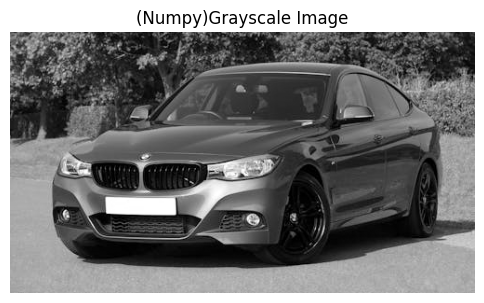

In [8]:
#processing using numpy
arr_img = np.array(img)
R = arr_img[:,:,0]
G = arr_img[:,:,1]
B = arr_img[:,:,2]
np_gray = 0.299*R+0.587*G+0.114*B
plt.figure(figsize=(6,6))
plt.imshow(np_gray,cmap='gray')
plt.title('(Numpy)Grayscale Image')
plt.axis('off')
plt.show()

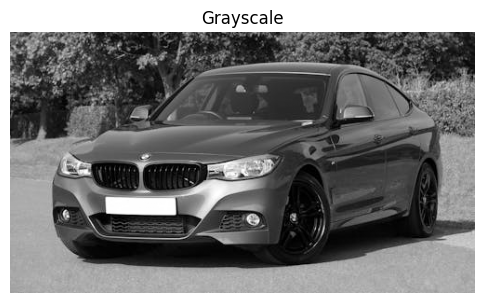

In [9]:
#Gray conversion using cv2 function
img_bgr = cv2.imread("/content/filetoup.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) #rgb to gray convert
plt.figure(figsize=(6,6))
plt.imshow(gray,cmap = 'gray')
plt.title("Grayscale")
plt.axis("off")
plt.show()

In [10]:
#Printing the shape of grayscale and RGB images
print("Shape(RGB)",arr_img.shape)
print("Shape(Gray)",gray.shape)

Shape(RGB) (281, 500, 3)
Shape(Gray) (281, 500)


In [14]:
print(arr_img[1,1])
print(arr_img[0,1])
print(gray[0,0])
print(gray[1,1])

[144  76   1]
[164  91  14]
126
88


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

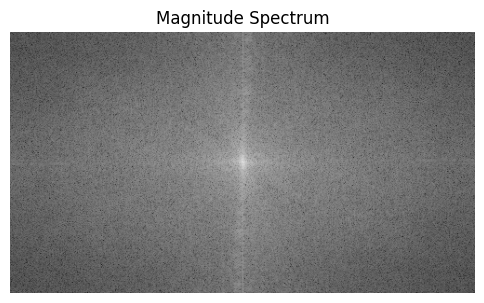

In [15]:
f_gray = gray.astype(np.float32) #conversion to flot for mathematical operations
f = np.fft.fft2(f_gray)
fshift = np.fft.fftshift(f)
magnitude = 20 *np.log(np.abs(fshift)+1)  #Magnitude
phase = np.angle(fshift)    #Phase
plt.figure(figsize=(6, 6))
plt.imshow(magnitude, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()  #Showing of magnitude spectrum

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

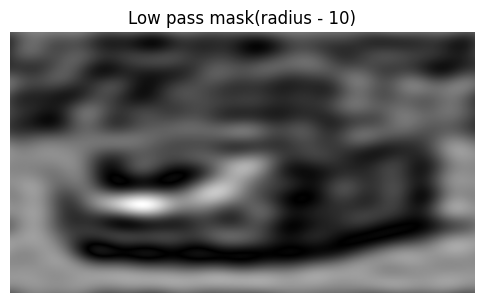

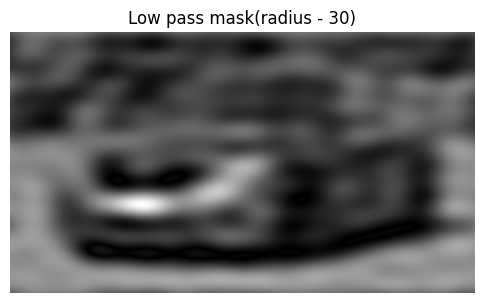

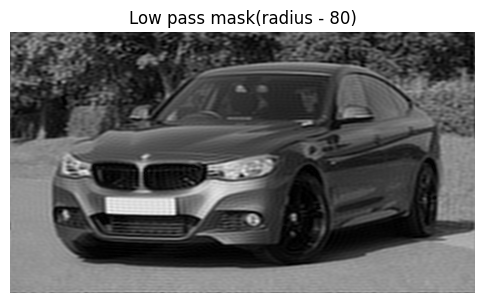

In [ ]:
#Low pass mask
rows , cols = gray.shape
crow,ccol = rows//2 , cols//2
#Create LPF mask
#Case 1 - radius = 10
radius1 = 10
mask_lpf1 = np.zeros((rows,cols), np.uint8)
cv2.circle(mask_lpf1 , (ccol,crow),radius1,1,-1)
f_lpf1 = fshift * mask_lpf1
ishift_lpf1 = np.fft.ifftshift(f_lpf1)
img_back_lpf = np.fft.ifft2(ishift_lpf1)
img_back_lpf = np.abs(img_back_lpf)
plt.figure(figsize=(6,6))
plt.imshow(img_back_lpf,cmap = 'gray')
plt.title("Low pass mask(radius - 10)")
plt.axis("off")
plt.show()
#Case 2 - radius = 30
radius2 = 30
mask_lpf2 = np.zeros((rows,cols), np.uint8)
cv2.circle(mask_lpf2 , (ccol,crow),radius2,1,-1)
f_lpf2 = fshift * mask_lpf1
ishift_lpf2 = np.fft.ifftshift(f_lpf2)
img_back_lpf2 = np.fft.ifft2(ishift_lpf2)
img_back_lpf2 = np.abs(img_back_lpf2)
plt.figure(figsize=(6,6))
plt.imshow(img_back_lpf2,cmap = 'gray')
plt.title("Low pass mask(radius - 30)")
plt.axis("off")
plt.show()
#Case 3 - radius = 80
radius3 = 80
mask_lpf3 = np.zeros((rows,cols), np.uint8)
cv2.circle(mask_lpf3 , (ccol,crow),radius3,1,-1)
f_lpf3 = fshift * mask_lpf3
ishift_lpf3 = np.fft.ifftshift(f_lpf3)
img_back_lpf3 = np.fft.ifft2(ishift_lpf3)
img_back_lpf3 = np.abs(img_back_lpf3)
plt.figure(figsize=(6,6))
plt.imshow(img_back_lpf3,cmap = 'gray')
plt.title("Low pass mask(radius - 80)")
plt.axis("off")
plt.show()
# A smaller radius removes more high-frequency components (edges and fine details),
# leaving only the low-frequency base of the image, which results in a blurrier output

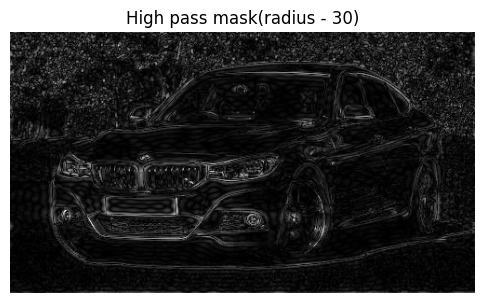

In [ ]:
#High Pass Mask(for radius = 30 only)
mask_hpf = 1 - mask_lpf2 # mask for 30 radius lpf
f_hpf = fshift * mask_hpf
ishift_hpf = np.fft.ifftshift(f_hpf)
img_back_hpf = np.fft.ifft2(ishift_hpf)
img_back_hpf = abs(img_back_hpf)
plt.figure(figsize=(6,6))
plt.imshow(img_back_hpf,cmap='gray')
plt.title("High pass mask(radius - 30)")
plt.axis("off")
plt.show()


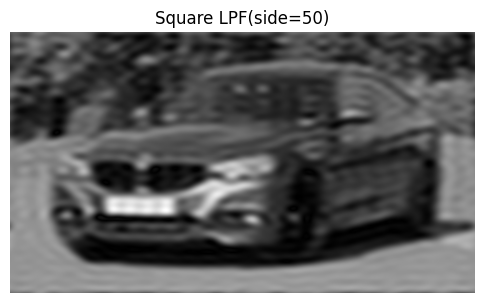

In [ ]:
#square LPF with side = 50
side = 50
spl = side//2
mask_square = np.zeros((rows,cols), np.uint8)
mask_square[crow-spl:crow+spl,ccol-spl:ccol+spl] = 1
f_square = fshift * mask_square
f_ishift_sq = np.fft.ifftshift(f_square)
img_back_sq = np.fft.ifft2(f_ishift_sq)
img_back_sq = np.abs(img_back_sq)
plt.figure(figsize=(6,6))
plt.imshow(img_back_sq,cmap = 'gray')
plt.title("Square LPF(side=50)")
plt.axis("off")
plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

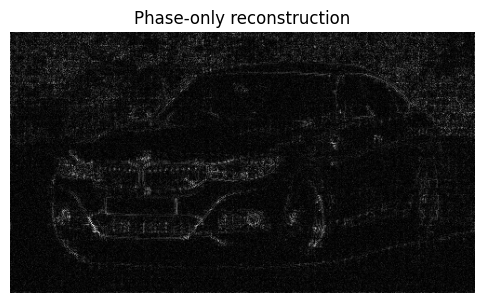

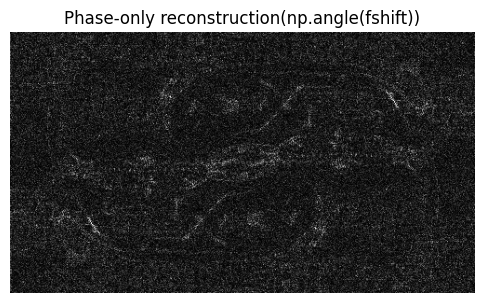

In [ ]:
#D1 part - phase-only reconstruction
#Firstly using the phase_only part given in D1
phase_only = fshift / np.abs(fshift)
ishift_phase = np.fft.ifftshift(phase_only)
img_back_phase = np.fft.ifft2(ishift_phase)
img_back_phase = np.abs(img_back_phase)
plt.figure(figsize=(6,6))
plt.imshow(img_back_phase, cmap = 'gray')
plt.title("Phase-only reconstruction")
plt.axis("off")
plt.show()
#Explaination - this method creates a complex number(a+ib),which the IFFT requires to understand the direction,
# so clear reconstruction happens

#using np.angle(fshift)
angle_value = np.angle(fshift)
img_back_angle = np.fft.ifft2(angle_value)
img_back_angle = np.abs(img_back_angle)
plt.figure(figsize=(6,6))
plt.imshow(img_back_angle, cmap ='gray')
plt.title("Phase-only reconstruction(np.angle(fshift))")
plt.axis("off")
plt.show()
#Explaination - simply returns a real number, when this goes for IFFT this is misinterpreted as intensity or amplitude value,
# This is why output looks like noisy or unclear


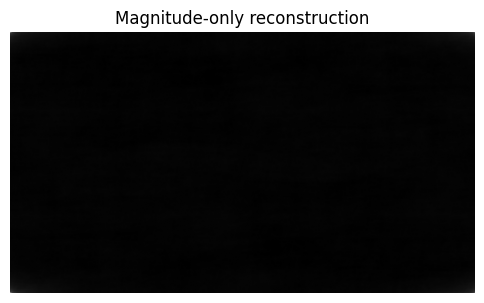

In [ ]:
#Magnitude only reconstruction
mag_only = np.abs(fshift)
ishift_mag = np.fft.ifftshift(mag_only)
img_back_mag = np.fft.ifft2(ishift_mag)
img_back_mag = np.abs(img_back_mag)
plt.figure(figsize=(6,6))
plt.imshow(img_back_mag, cmap = 'gray')
plt.title("Magnitude-only reconstruction")
plt.axis("off")
plt.show()
# Role of Logarithm:
# THe dynamic range of the magnitude values is massive, the logarithm compresses
# this range, allowing us to see weaker frequencies that would otherwise appear
# as black
# Looking different :
# The spectrum visualization used a logarithm to make faint details visible,
# whereas this reconstruction uses raw values where the massive central peak
# makes everything else scale down to black

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

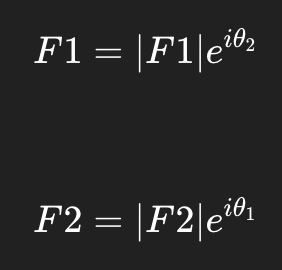

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


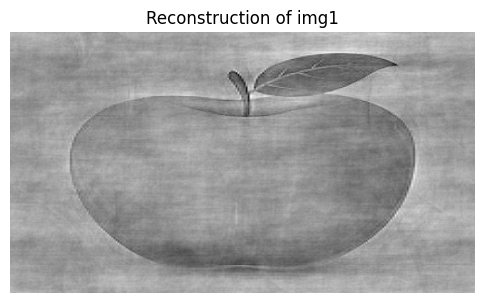

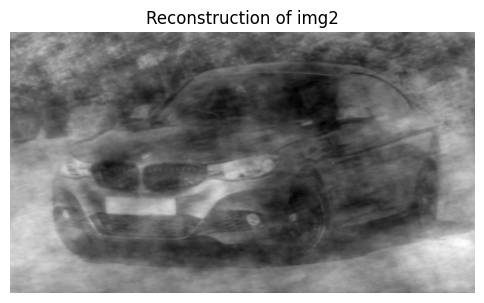

In [ ]:

#processing for image
img1 = cv2.imread('/content/filetoup.jpg',0)
img2 = cv2.imread('/content/newtoup.jpg',0)
img2 = cv2.resize(img2,(img1.shape[1],img1.shape[0])) # We have to resize the image to match the dimensions of both
f1 = np.fft.fft2(img1)
f2 = np.fft.fft2(img2)
f1_mag = np.abs(f1)  #Extracting the magnitude of the images
f2_mag = np.abs(f2)
# Phase calculation of the images
f1_angle = np.angle(f1)
f2_angle = np.angle(f2)
# Exchanging the phase and magnitude
f1_new = f1_mag*np.exp(1j * f2_angle)
f2_new = f2_mag* np.exp(1j * f1_angle)
#New images
img1_new = np.real(np.fft.ifft2(f1_new))
img2_new = np.real(np.fft.ifft2(f2_new))
#Showing the images
plt.figure(figsize=(6,6))
plt.imshow(img1_new, cmap='gray')
plt.title('Reconstruction of img1')
plt.axis('off')
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(img2_new, cmap='gray')
plt.title('Reconstruction of img2')
plt.axis('off')
plt.show()
#Observations
#The reconstructed images resemble the image that provides the phase ,
# not the magnitude
# Phase describes the structure (edges,geometry) of the image,while magnitude
# describes the texture/contrast



